In [732]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser
from datetime import datetime
sns.set_style('darkgrid')

In [733]:
df1 = pd.read_excel('O2D_delay_data.xlsx', 'logistics')
df2 = pd.read_excel('O2D_delay_data.xlsx', 'po_level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

sno       date     po_number  po_qty seller_po_creation_date  \
0    1 2024-04-12   PO/25/MH/96    60.0              2024-04-12   
1    2 2024-04-10   PO/25/MH/73   300.0              2024-04-10   
2    3 2024-04-10   PO/25/MH/73   300.0              2024-04-10   
3    4 2024-04-12   PO/25/MH/96    60.0              2024-04-12   
4    5 2024-04-16  PO/25/HA/111   600.0              2024-04-16   

          category  dispatched_qty    origin   destination dispatch_week  \
0  RMC - Aluminium       29.709999    Raipur   Gandhinagar  April 2 Week   
1      RMC - Steel       39.230000    Raipur         Jalna  April 3 Week   
2      RMC - Steel       34.189999    Raipur         Jalna  April 3 Week   
3  RMC - Aluminium       29.260000    Raipur   Gandhinagar  April 3 Week   
4      RMC - Steel       25.129999  Durgapur  Sikendarabad  April 3 Week   

                 po_ts nextbuy_order_indent_ts nextbuy_vehicle_indent_ts  \
0  04-12-2024 19:20:32      4/12/2024 20:07:00        4/12/2024 20:07:00   
1  04/10/2024 18:53:40      4/12/2024 20:40:00        4/12/2024 20:40:00   
2  04/10/2024 18:53:40      4/12/2024 20:40:00        4/12/2024 20:40:00   
3  04-12-2024 19:20:32      4/12/2024 20:07:00        4/14/2024 21:50:00   
4  04/16/2024 17:54:35      4/17/2024 16:23:00        4/17/2024 16:23:00   

  transporter_order_indent_ts transporter_order_indent_acceptance_ts  \
0          4/12/2024 20:12:00                     4/12/2024 20:45:00   
1          4/12/2024 20:55:00                     4/12/2024 21:40:00   
2          4/12/2024 20:55:00                     4/12/2024 21:40:00   
3          4/12/2024 20:12:00                     4/12/2024 20:45:00   
4          4/18/2024 10:20:00                     4/18/2024 10:50:00   

  vehicle_placement_ts expected_date_of_vehicle_reporting vehicle_reported_ts  \
0   4/13/2024 11:52:00                 4/13/2024 23:59:59  4/13/2024 12:51:00   
1   4/13/2024 18:22:00                 4/14/2024 23:59:59   4/14/2024 7:26:00   
2   4/13/2024 18:22:00                 4/14/2024 23:59:59   4/14/2024 7:26:00   
3   4/15/2024 11:55:00                 4/15/2024 23:59:59  4/15/2024 13:30:00   
4   4/22/2024 11:00:00                 4/19/2024 23:59:59    04/24/24 4:05:00   

    vehicle_loaded_ts vehicle_dispatched_ts  \
0  4/13/2024 15:57:00    4/13/2024 18:02:00   
1  4/15/2024 14:10:00    4/15/2024 15:32:00   
2  4/15/2024 16:37:00    4/15/2024 17:20:00   
3  4/15/2024 17:55:00    4/15/2024 19:30:00   
4   04/24/24 14:02:00   04/24/2024 22:15:00   

  vehicle_reached_delivery_location_ts payment_confirmation_received_by_ops  \
0                    4/16/2024 9:55:00                   4/16/2024 10:15:00   
1                    4/18/2024 9:00:00                   4/18/2024 10:12:00   
2                   4/18/2024 12:00:00                   4/18/2024 12:00:00   
3                   4/17/2024 20:00:00                   4/18/2024 15:20:00   
4                   4/26/2024 23:00:00                  04/27/2024 16:15:00   

   vehicle_unloaded_ts  nextbuy_order_indent_tat  nextbuy_vehicle_indent_tat  \
0   4/16/2024 13:30:00                  0.032280                    0.000012   
1   4/19/2024 10:45:00                  2.073854                    0.000012   
2   4/19/2024 11:30:00                  2.073854                    0.000012   
3   4/18/2024 16:30:00                  0.032280                    2.071539   
4  04/28/2024 15:00:00                  0.936412                    0.000012   

   vehicle_placement_tat  vehicle_reported_tat  vehicle_dispatch_tat  \
0               0.656262              0.040984              0.215984   
1               0.904178              0.544456              1.337512   
2               0.904178              0.544456              1.412512   
3               0.586817              0.065984              0.250012   
4               4.775706              1.711817              0.756956   

   vehicle_reported_actual_vs_expected  transporter_order_tat  \
0                            

In [734]:
df2_selected_cols = df2[['buyer_name', 'seller_name', 'seller_po_number',
       'transporter_type', 'order_type',
       'order_completion_percentage', 'o2d_', 'O2D_Bucket']]
df = df1.merge(df2_selected_cols, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

# ## removing all the po which has NA in dispatched_qty
# dispatch_qty_na_po = set(df[df['dispatched_qty'].isna()]['po_number'].unique())
# print('Shape of df before filtering the po with NAN dispatch_qty')
# print(df.shape)
# df = df[~df['po_number'].isin(dispatch_qty_na_po)]
# print('Shape of df after filtering the po with NAN dispatch_qty')
print(df.shape)

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'
df.loc[(df['transporter_type'] == 'Bizongo Non O2D'), 'transporter_type'] = 'Bizongo'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')
df = df[~df['po_number'].isin(['PO/25/MH/498','PO/25/MH/564', 'PO/25/MH/568'])]
df = df[~df['po_qty'].isna()]

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()
df['lane_order'] = df.groupby('route')[['po_ts']].rank(method='min')
df.rename(columns = {'o2d_' : 'O2D_'}, inplace = True)

### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

(163, 41)
(158, 46)


In [735]:
"""

Q. But if all the po_qty can be dispatched at the same day. Then why is this so?
1. Can be manufacturing limitation on supplier side.
2. Payment or storage capacity limitation on buyer side.
3. Vehicle unavailability.

Q. If O2D is more than 6 (or the expected O2D value), then how to identify which of the above factors are imacting?
1. The transporters are contacted only when the goods are ready at supplier's end. 
    So the time taken from po_ts to vehicle indent should represent the manufacturer limitation.

2. If vehicle reaching the destination to payment TAT is high, then that reflects the payment crunch.
    At the same time, vehicle reaching the destination to payment TAT + payment to unloading TAT 
    can refect the storage limitation.

3. From vehicle indent to vehicle acceptance, and from vehicle accetance to placement TAT will reflect the vehicle scarcity.
-> But transporter order acceptance is same for all the dispatches of the same po_number. 
So hard to identify if its unavailability.

"""

"\n\nQ. But if all the po_qty can be dispatched at the same day. Then why is this so?\n1. Can be manufacturing limitation on supplier side.\n2. Payment or storage capacity limitation on buyer side.\n3. Vehicle unavailability.\n\nQ. If O2D is more than 6 (or the expected O2D value), then how to identify which of the above factors are imacting?\n1. The transporters are contacted only when the goods are ready at supplier's end. \n    So the time taken from po_ts to vehicle indent should represent the manufacturer limitation.\n\n2. If vehicle reaching the destination to payment TAT is high, then that reflects the payment crunch.\n    At the same time, vehicle reaching the destination to payment TAT + payment to unloading TAT \n    can refect the storage limitation.\n\n3. From vehicle indent to vehicle acceptance, and from vehicle accetance to placement TAT will reflect the vehicle scarcity.\n-> But transporter order acceptance is same for all the dispatches of the same po_number. \nSo hard

In [736]:
from datetime import datetime
import pandas as pd
import numpy as np

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str.strftime("%m/%d/%Y %H:%M:%S")
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Remove any extra spaces before the time part
        date_str = date_str.strip()
        if ' :' in date_str:
            date_str = date_str.replace(' :', ' ')
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Try different possible input formats for string inputs
        possible_formats = [
            "%m/%d/%y %H:%M:%S",
            "%m/%d/%Y %H:%M:%S",
            "%-m/%-d/%y %H:%M:%S",   # Single-digit month and day
            "%-m/%-d/%Y %H:%M:%S",   # Single-digit month and day
        ]
        
        for fmt in possible_formats:
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt.strftime("%m/%d/%Y %H:%M:%S")
            except ValueError:
                pass
        
    raise ValueError(f"Date format not recognized for '{date_str}'")



###############    Unloading Data     #############
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))
df['payment_confirmation_received_by_ops'] = df['payment_confirmation_received_by_ops'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_reached_delivery_location_ts'] = pd.to_datetime(df['vehicle_reached_delivery_location_ts'])
df['payment_confirmation_received_by_ops'] = pd.to_datetime(df['payment_confirmation_received_by_ops'])
df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])


df['unloading_time_total'] = (df['vehicle_unloaded_ts'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['reached_to_payment_tat'] = (df['payment_confirmation_received_by_ops'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['payment_to_unloading_tat'] = (df['vehicle_unloaded_ts'] - df['payment_confirmation_received_by_ops']).dt.total_seconds() / (3600 * 24)



############    Seller Level   ##########

df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_loaded_ts'] = df['vehicle_loaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
df['vehicle_reported_ts'] = pd.to_datetime(df['vehicle_reported_ts'])
df['vehicle_loaded_ts'] = pd.to_datetime(df['vehicle_loaded_ts'])


df['seller_total_time'] = (df['vehicle_dispatched_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_reported_to_load_tat'] = (df['vehicle_loaded_ts'] - df['vehicle_reported_ts']).dt.total_seconds() / (3600 * 24)
df['vehicle_loaded_to_dispatch_tat'] = (df['vehicle_dispatched_ts'] - df['vehicle_loaded_ts']).dt.total_seconds() / (3600 * 24)

###########   Transporter Level    ########33

df['nextbuy_vehicle_indent_ts'] = df['nextbuy_vehicle_indent_ts'].apply(lambda x: convert_date_format(x))
# df['vehicle_placement_ts'] = df['vehicle_placement_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reported_ts'] = df['vehicle_reported_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_dispatched_ts'] = df['vehicle_dispatched_ts'].apply(lambda x: convert_date_format(x))
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))


df['transporter_time'] = df['vehicle_reported_actual_vs_expected']
df['transporter_indent_to_accept_tat'] = (pd.to_datetime(df['transporter_order_indent_acceptance_ts']) - pd.to_datetime(df['transporter_order_indent_ts'])).dt.total_seconds() / (3600 * 24)
df['transporter_accept_to_placement_tat'] = (pd.to_datetime(df['vehicle_reported_ts']) - pd.to_datetime(df['transporter_order_indent_acceptance_ts'])).dt.total_seconds() / (3600 * 24)




#############     Internal      ################
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'], errors='coerce')
df['nextbuy_vehicle_indent_ts'] = pd.to_datetime(df['nextbuy_vehicle_indent_ts'].apply(convert_date_format))
df['transporter_order_indent_acceptance_ts'] = pd.to_datetime(df['transporter_order_indent_acceptance_ts'].apply(convert_date_format))


df['po_ts'] = pd.to_datetime(df['po_ts'], errors='coerce')
df['expected_date_of_vehicle_reporting'] = pd.to_datetime(df['expected_date_of_vehicle_reporting'], errors='coerce')
df['vehicle_indent_to_accept_tat'] = (df['transporter_order_indent_acceptance_ts'] - df['nextbuy_vehicle_indent_ts']).dt.total_seconds() / (3600 * 24)


df['po_ts_to_expected_reporting'] = (df['expected_date_of_vehicle_reporting'] - df['po_ts']).dt.total_seconds() / (3600 * 24)



route = df[['route']]
df = pd.get_dummies(df, columns=['route'], prefix='route')
df = df.replace({True: 1, False: 0})
df = pd.concat([df, route], axis=1)

# df[df['delay_in_unloading'] >= 1].head()


df['steel'] = df['category'].apply(lambda x : 1 if x == 'RMC - Steel' else 0)
df['al'] = df['steel'].apply(lambda x : 1 if x == 0 else 0)

/tmp/ipykernel_90639/2002994146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])


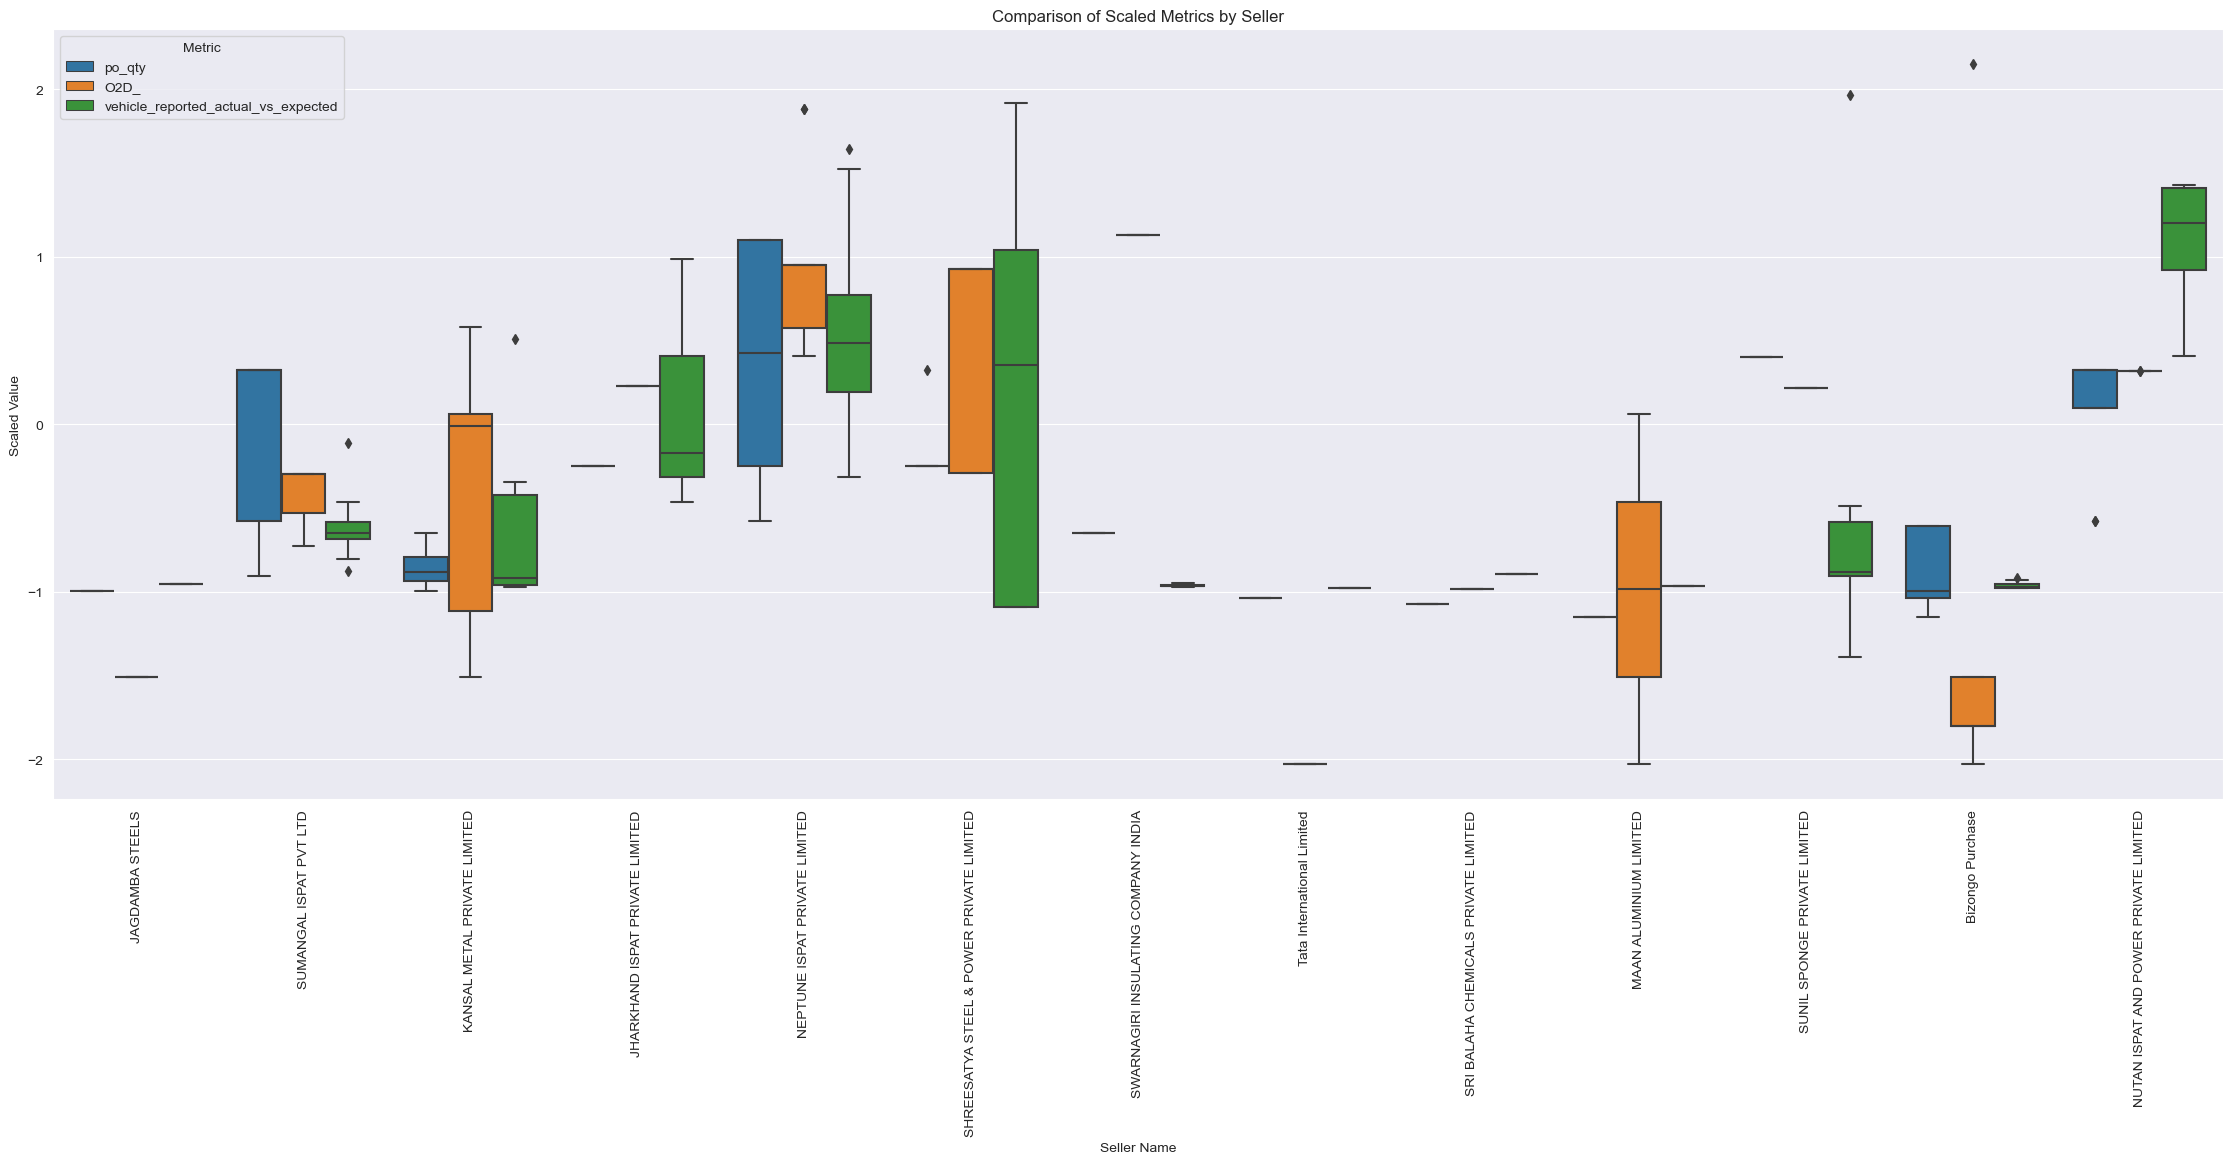

In [737]:
from sklearn.preprocessing import StandardScaler

non_april_df = df[df['Month'] != 'April']
columns_to_scale = ['po_qty','O2D_', 'vehicle_reported_actual_vs_expected']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
non_april_df[columns_to_scale] = scaler.fit_transform(non_april_df[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(non_april_df, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(28, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=90)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

/tmp/ipykernel_90639/2099108607.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al[columns_to_scale] = scaler.fit_transform(al[columns_to_scale])


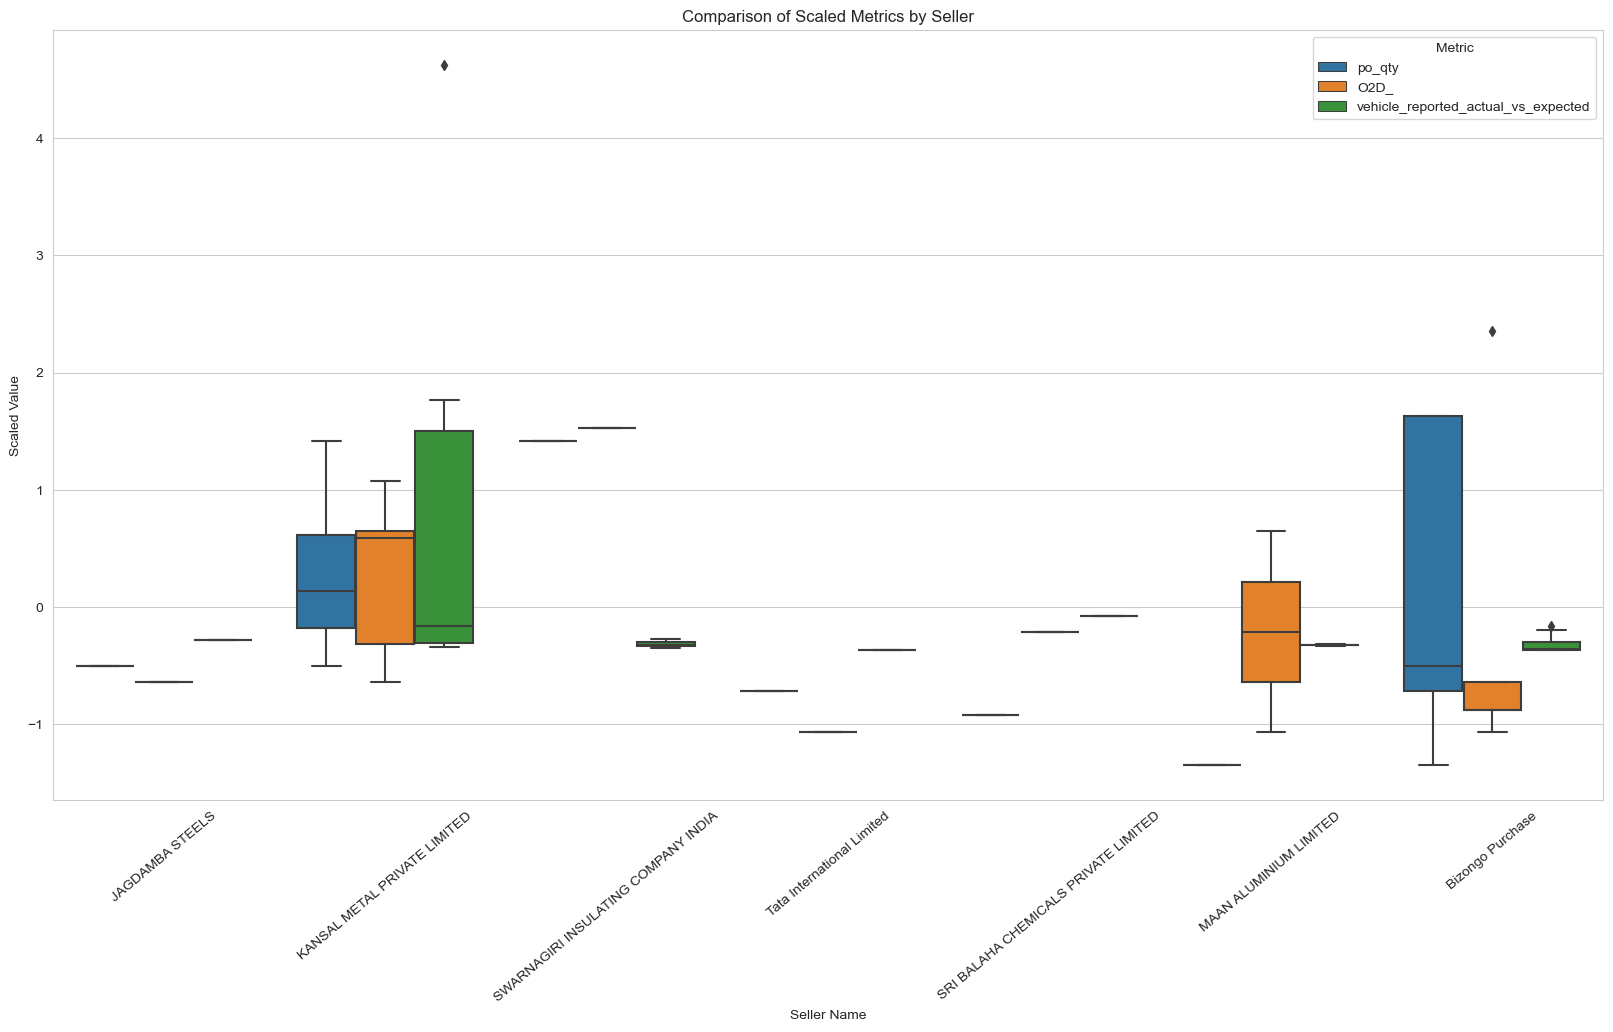

In [754]:
from sklearn.preprocessing import StandardScaler

non_april_df = df[df['Month'] != 'April']
columns_to_scale = ['po_qty','O2D_', 'vehicle_reported_actual_vs_expected']
al = non_april_df[non_april_df['category'] == 'RMC - Aluminium']
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
al[columns_to_scale] = scaler.fit_transform(al[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(al, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=40)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

/tmp/ipykernel_90639/1711867997.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al[columns_to_scale] = scaler.fit_transform(al[columns_to_scale])


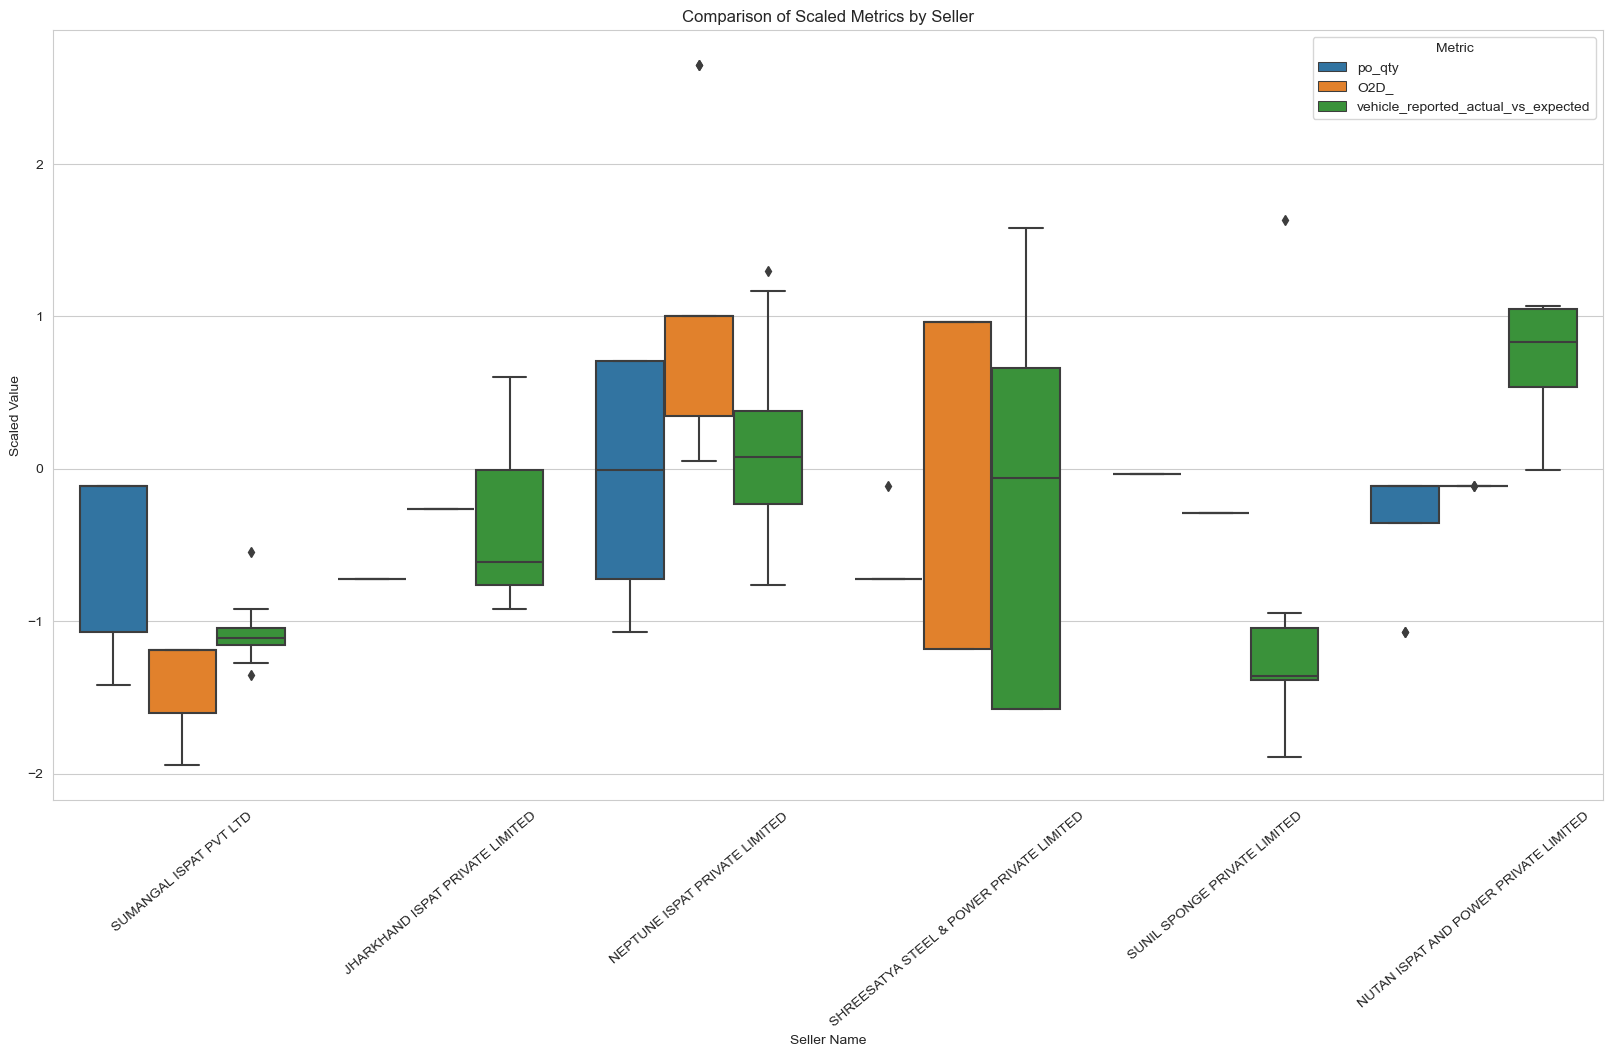

In [755]:
from sklearn.preprocessing import StandardScaler

non_april_df = df[df['Month'] != 'April']
columns_to_scale = ['po_qty','O2D_', 'vehicle_reported_actual_vs_expected']
al = non_april_df[non_april_df['category'] == 'RMC - Steel']
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
al[columns_to_scale] = scaler.fit_transform(al[columns_to_scale])

# Reshape the DataFrame to long format
df_melted = pd.melt(al, id_vars=['seller_name'], 
                    value_vars=columns_to_scale,
                    var_name='Metric', value_name='Value')

# Create a boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='seller_name', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Comparison of Scaled Metrics by Seller')
plt.xlabel('Seller Name')
plt.ylabel('Scaled Value')
plt.xticks(rotation=40)
# plt.grids()

# Show plot
plt.legend(title='Metric')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

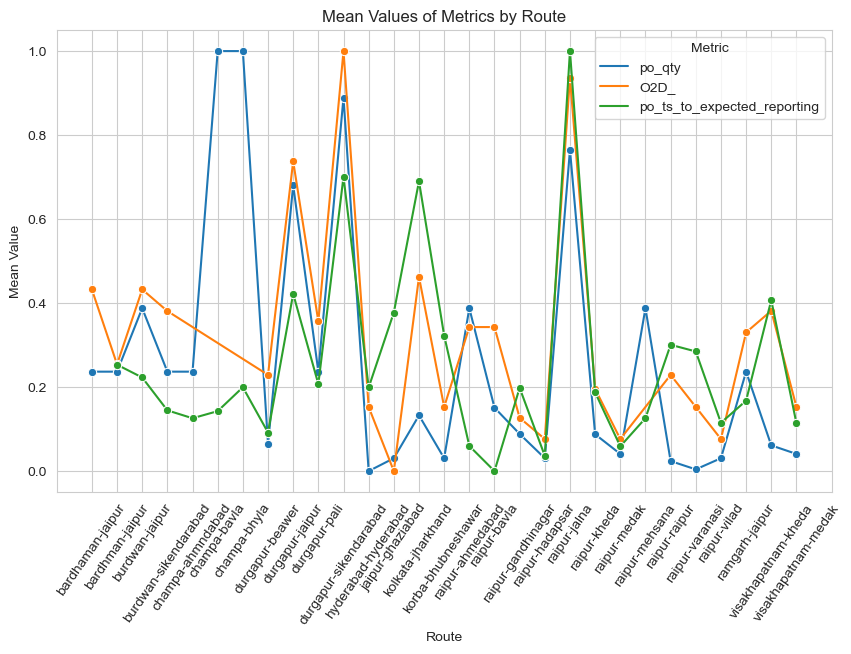

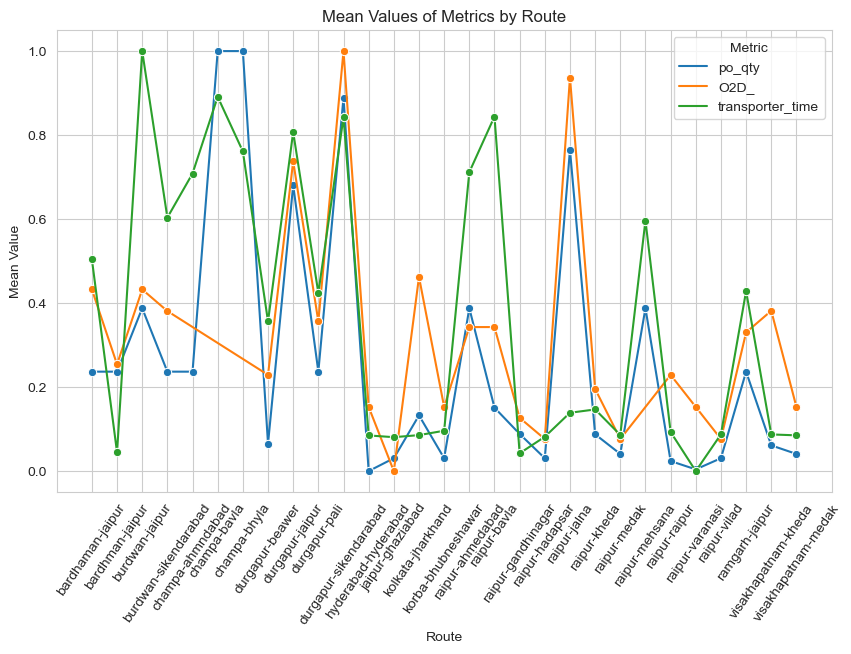

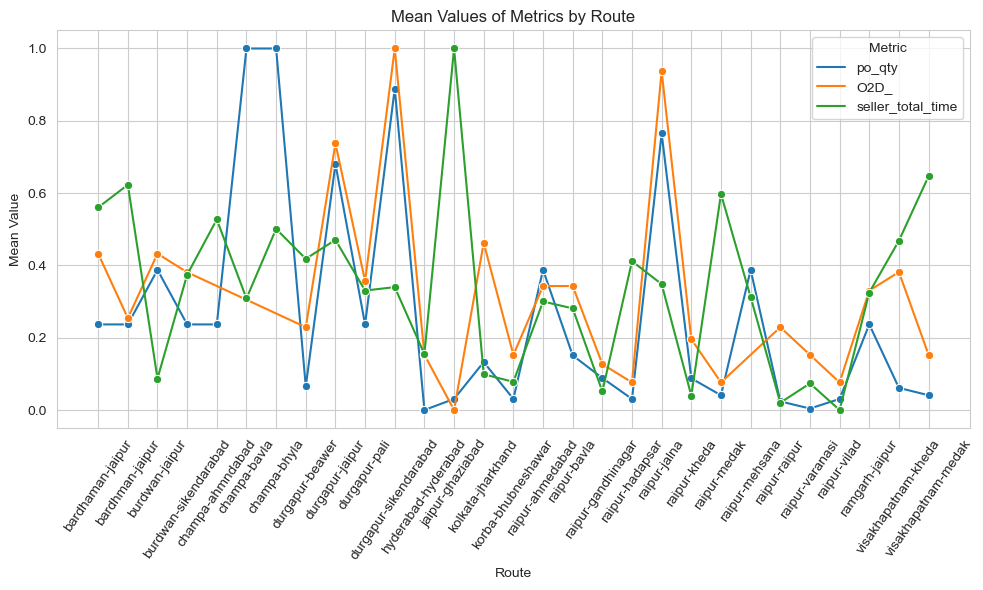

In [750]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()
scaler = MinMaxScaler()
# Calculate mean values

for col in ['po_ts_to_expected_reporting','transporter_time','seller_total_time']:
    mean_values = df.groupby('route')[['po_qty', 'O2D_', col ]].mean().reset_index()
    
    # Normalize the mean values
    mean_values_normalized = mean_values.copy()
    mean_values_normalized[['po_qty', 'O2D_',col]] = scaler.fit_transform(mean_values[['po_qty', 'O2D_', col]])
    
    # Melt the DataFrame to make plotting easier
    mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], 
                                 value_vars=[ 'po_qty', 'O2D_', col],
                                 var_name='Metric', value_name='Mean Value')
    
    # Plotting
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
    plt.title('Mean Values of Metrics by Route')
    plt.xlabel('Route')
    plt.ylabel('Mean Value')
    plt.legend(title='Metric')
    plt.xticks(rotation=55)
    
    plt.grid(True)
plt.tight_layout()

plt.show()


### Lane wise pattern

In [702]:
route_count = df.groupby('route')['po_number'].nunique().reset_index()
router = route_count[route_count['po_number'] > 1]['route']

df['lane_order'] = df.groupby('route')['po_ts'].rank(method='dense')
df['lane_order'] = df['lane_order'].fillna(1).astype(int)
df.loc[~df['route'].isin(router), 'lane_order'] = 1

mean_transporter_time = df.groupby(['route', 'lane_order'])['transporter_time'].mean().reset_index()


may_june_df = df[df['Month'] != 'April']
temp = may_june_df.pivot_table(index = ['lane_order', 'route'],  aggfunc = { 'o2d_' :'mean', 'transporter_time' : 'mean','po_qty':'mean'}).fillna(0).round(2).reset_index().sort_values(by=['lane_order', 'transporter_time'], ascending=[True, False])
temp.head()
# df.pivot_table(index = ['lane_order', 'route'],  aggfunc = { 'o2d_' :'mean', 'transporter_time' : 'mean', 'seller_total_time' : 'mean'}).fillna(0).round(2).reset_index().sort_values(by=['lane_order', 'transporter_time'], ascending=[True, False])

# temp.to_csv('sample.csv', index = False)

lane_order             route  o2d_  po_qty  transporter_time
8            1      raipur-bavla  4.49    84.0              4.85
7            1  raipur-ahmedabad  4.49   200.0              4.01
12           1    raipur-mehsana  0.00   200.0              3.28
14           1    ramgarh-jaipur  4.33   126.0              2.21
2            1     durgapur-pali  4.67   126.0              2.18

In [703]:
df[(df['route'] == 'durgapur-jaipur') & (df['lane_order']==4)]

sno       date     po_number  po_qty seller_po_creation_date     category  \
62  106 2024-06-17  PO/25/HA/598    84.0              2024-06-17  RMC - Steel   
63  128 2024-06-17  PO/25/HA/598    84.0              2024-06-17  RMC - Steel   

    dispatched_qty    origin destination dispatch_week               po_ts  \
62       41.709999  Durgapur      Jaipur   June 3 Week 2024-06-17 17:50:00   
63       40.860001  Durgapur      Jaipur   June 4 Week 2024-06-17 17:50:00   

   nextbuy_order_indent_ts nextbuy_vehicle_indent_ts  \
62     06/17/2024 17:50:00       2024-06-17 22:59:00   
63     06/17/2024 17:50:00       2024-06-17 22:59:00   

   transporter_order_indent_ts transporter_order_indent_acceptance_ts  \
62         06/18/2024 11:00:00                    2024-06-18 11:30:00   
63         06/18/2024 11:00:00                    2024-06-18 11:30:00   

   vehicle_placement_ts expected_date_of_vehicle_reporting  \
62  06/22/2024 18:07:00                2024-06-19 10:00:00   
63  06/24/2024 11:31:00                2024-06-19 18:00:00   

    vehicle_reported_ts   vehicle_loaded_ts vehicle_dispatched_ts  \
62  06/24/2024 11:00:00 2024-06-24 19:07:00   2024-06-24 22:00:00   
63  06/25/2024 01:00:00 2024-06-25 19:38:00   2024-06-25 22:00:00   

   vehicle_reached_delivery_location_ts payment_confirmation_received_by_ops  \
62                  06/27/2024 17:46:00                                  NaT   
63                  07/03/2024 02:00:00                                  NaT   

    vehicle_unloaded_ts  nextbuy_order_indent_tat  nextbuy_vehicle_indent_tat  \
62  06/29/2024 02:00:00                  0.000012                    0.214595   
63                  NaN                  0.000012                    0.214595   

    vehicle_placement_tat  vehicle_reported_tat  vehicle_dispatch_tat  \
62               4.797234              1.703484              0.458345   
63               6.522234              0.561817              0.875012   

    vehicle_reported_actual_vs_expected  transporter_order_tat  \
62                             5.041655               0.715289   
63                             5.291655               0.715289   

    dispatch_to_delivery_tat  unloading_tat  vehicle_level_o2d  \
62                  2.823623       1.343067                NaN   
63                  7.166678       4.916667            8.17361   

                      buyer_name                    seller_name  \
62  Amar Partap Steels Pvt. Ltd.  NEPTUNE ISPAT PRIVATE LIMITED   
63  Amar Partap Steels Pvt. Ltd.  NEPTUNE ISPAT PRIVATE LIMITED   

   seller_po_number transporter_type order_type  order_completion_percentage  \
62     PO/25/HA/598          Bizongo        S2B                    98.297619   
63     PO/25/HA/598          Bizongo        S2B                    98.297619   

        o2d_ O2D_Bucket  order  lane_order Month  total_rounds  \
62  7.494853    6+ days    1.0           4  June             2   
63  7.494853    6+ days    2.0           4  June             2   

    unloading_time_total  reached_to_payment_tat  payment_to_unloading_tat  \
62              1.343056                     NaN                       NaN   
63                   NaN                     NaN                       NaN   

    seller_total_time  vehicle_reported_to_load_tat  \
62           0.458333                      0.338194   
63           0.875000                      0.776389   

    vehicle_loaded_to_dispatch_tat  transporter_time  \
62                        0.120139          5.041655   
63                        0.098611          5.291655   

    transporter_indent_to_accept_tat  transporter_accept_to_placement_tat  \
62                          0.020833                             5.979167   
63                          0.020833                             6.562500   

    vehicle_indent_to_accept_tat  po_ts_to_expected_reporting  \
62                      0.521528                     1.673611   
63                      0.521528                     2.006944   

In [704]:
df[df['po_number'] == 'PO/25/HA/664']

Empty DataFrame
Columns: [sno, date, po_number, po_qty, seller_po_creation_date, category, dispatched_qty, origin, destination, dispatch_week, po_ts, nextbuy_order_indent_ts, nextbuy_vehicle_indent_ts, transporter_order_indent_ts, transporter_order_indent_acceptance_ts, vehicle_placement_ts, expected_date_of_vehicle_reporting, vehicle_reported_ts, vehicle_loaded_ts, vehicle_dispatched_ts, vehicle_reached_delivery_location_ts, payment_confirmation_received_by_ops, vehicle_unloaded_ts, nextbuy_order_indent_tat, nextbuy_vehicle_indent_tat, vehicle_placement_tat, vehicle_reported_tat, vehicle_dispatch_tat, vehicle_reported_actual_vs_expected, transporter_order_tat, dispatch_to_delivery_tat, unloading_tat, vehicle_level_o2d, buyer_name, seller_name, seller_po_number, transporter_type, order_type, order_completion_percentage, o2d_, O2D_Bucket, order, lane_order, Month, total_rounds, unloading_time_total, reached_to_payment_tat, payment_to_unloading_tat, seller_total_time, vehicle_reported_to_load_tat, vehicle_loaded_to_dispatch_tat, transporter_time, transporter_indent_to_accept_tat, transporter_accept_to_placement_tat, vehicle_indent_to_accept_tat, po_ts_to_expected_reporting, route_bardhman-jaipur, route_durgapur-beawer, route_durgapur-jaipur, route_durgapur-pali, route_durgapur-sikendarabad, route_hyderabad-hyderabad, route_jaipur-ghaziabad, route_kolkata-jharkhand, route_korba-bhubneshawar, route_raipur-ahmedabad, route_raipur-bavla, route_raipur-gandhinagar, route_raipur-hadapsar, route_raipur-hyderabad, route_raipur-jalna, route_raipur-kheda, route_raipur-medak, route_raipur-mehsana, route_raipur-raipur, route_raipur-varanasi, route_ramgarh-jaipur, route_visakhapatnam-kheda, route_visakhapatnam-medak, route_bardhman-jaipur, route_durgapur-beawer, route_durgapur-jaipur, route_durgapur-pali, route_durgapur-sikendarabad, route_hyderabad-hyderabad, route_jaipur-ghaziabad, route_kolkata-jharkhand, route_korba-bhubneshawar, route_raipur-ahmedabad, route_raipur-bavla, route_raipur-gandhinagar, route_raipur-hadapsar, route_raipur-hyderabad, route_raipur-jalna, route_raipur-kheda, route_raipur-medak, route_raipur-mehsana, route_raipur-raipur, route_raipur-varanasi, route_ramgarh-jaipur, ...]
Index: []

In [705]:
df[df['o2d_'].isna()]

sno       date     po_number  po_qty seller_po_creation_date  \
81   91 2024-06-03  PO/25/MH/493    30.0              2024-06-03   
82   94 2024-06-03  PO/25/MH/493    25.0              2024-06-03   
83   98 2024-06-11  PO/25/MH/533    30.0              2024-06-11   
86   96 2024-06-14  PO/25/MH/554    30.0              2024-06-14   
93  155 2024-06-28  PO/25/MH/646   200.0              2024-06-28   
94  137 2024-06-28  PO/25/MH/646   200.0              2024-06-28   
95  153 2024-06-28  PO/25/MH/646   200.0              2024-06-28   
96  154 2024-06-28  PO/25/MH/646   200.0              2024-06-28   

           category  dispatched_qty  origin   destination dispatch_week  \
81  RMC - Aluminium       30.048000  Raipur         Kheda   June 1 week   
82  RMC - Aluminium       25.000000  Raipur         Kheda   June 1 week   
83  RMC - Aluminium       24.528999   Korba  Bhubneshawar   June 3 Week   
86  RMC - Aluminium       24.780001  Raipur         Kheda   June 3 Week   
93      RMC - Steel       41.290001  Raipur       Mehsana   July 1 Week   
94      RMC - Steel       30.690001  Raipur       Mehsana   July 1 Week   
95      RMC - Steel       35.240002  Raipur       Mehsana   July 1 Week   
96      RMC - Steel       40.160000  Raipur       Mehsana   July 1 Week   

                 po_ts nextbuy_order_indent_ts nextbuy_vehicle_indent_ts  \
81 2024-06-03 11:30:00     06/03/2024 11:30:00       2024-06-03 11:30:00   
82 2024-06-03 11:30:00     06/03/2024 11:30:00       2024-06-05 10:30:00   
83 2024-06-12 09:46:00      06/12/2024 9:50:00       2024-06-12 11:30:00   
86 2024-06-14 11:20:00     06/15/2024 11:20:00       2024-06-15 11:20:00   
93 2024-06-28 22:54:00     06/28/2024 20:04:00       2024-06-28 20:04:00   
94 2024-06-28 22:54:00     06/28/2024 20:04:00       2024-06-28 20:04:00   
95 2024-06-28 22:54:00     06/28/2024 20:04:00       2024-06-28 20:04:00   
96 2024-06-28 22:54:00     06/28/2024 20:04:00       2024-06-28 20:04:00   

   transporter_order_indent_ts transporter_order_indent_acceptance_ts  \
81         06/03/2024 11:40:00                    2024-06-03 11:40:00   
82         06/05/2024 10:30:00                    2024-06-05 10:30:00   
83         06/15/2024 11:30:00                    2024-06-15 11:30:00   
86         06/15/2024 11:50:00                    2024-06-15 11:50:00   
93         06/28/2024 23:00:00                    2024-06-29 08:00:00   
94         06/28/2024 23:00:00                    2024-06-29 08:00:00   
95         06/28/2024 23:00:00                    2024-06-29 08:00:00   
96         06/28/2024 23:00:00                    2024-06-29 08:00:00   

   vehicle_placement_ts expected_date_of_vehicle_reporting  \
81  06/03/2024 12:40:00                2024-06-03 12:46:00   
82  06/05/2024 11:00:00                2024-06-05 11:30:00   
83  06/15/2024 11:30:00                2024-06-15 12:24:00   
86  06/15/2024 12:30:00                2024-06-15 12:50:00   
93  07/02/2024 19:31:00                2024-06-29 18:00:00   
94  07/02/2024 12:21:00                2024-06-29 18:00:00   
95  07/03/2024 18:13:00                2024-06-29 18:00:00   
96  07/03/2024 11:42:00                2024-06-29 18:00:00   

    vehicle_reported_ts   vehicle_loaded_ts vehicle_dispatched_ts  \
81  06/03/2024 12:46:00 2024-06-03 18:39:00   2024-06-03 20:10:00   
82  06/05/2024 11:50:00 2024-06-05 16:02:00   2024-06-05 18:20:00   
83  06/15/2024 12:55:00 2024-06-15 19:55:00   2024-06-15 20:30:00   
86  06/15/2024 12:55:00 2024-06-14 15:06:00   2024-06-15 17:06:00   
93  07/02/2024 21:20:00 2024-07-03 13:20:00   2024-07-03 17:30:00   
94  07/02/2024 14:55:00 2024-07-02 17:55:00   2024-07-02 21:35:00   
95  07/03/2024 16:22:00 2024-07-04 15:30:00   2024-07-04 16:00:00   
96  07/02/2024 21:50:00 2024-07-03 20:05:00   2024-07-03 20:05:00   

   vehicle_reached_delivery_location_ts payment_confirmation_received_by_ops  \
81                  06/05/2024 02:30:00                  2024-06-06 18:30:00   
82                  06/11/2024 

In [706]:
mean_transporter_time.groupby('lane_order')['transporter_time'].mean().reset_index()

lane_order  transporter_time
0           1          1.265167
1           2          0.944078
2           3          1.679796
3           4          2.586794
4           5          0.003461
5           6         -0.000012

In [707]:
mean_transporter_time

route  lane_order  transporter_time
0         bardhman-jaipur           1         -0.229178
1         durgapur-beawer           1          1.749988
2         durgapur-jaipur           1          6.609025
3         durgapur-jaipur           2          0.612488
4         durgapur-jaipur           3          0.625000
5         durgapur-jaipur           4          5.166655
6           durgapur-pali           1          2.180544
7   durgapur-sikendarabad           1          5.579531
8   durgapur-sikendarabad           2          5.143468
9   durgapur-sikendarabad           3          2.877593
10    hyderabad-hyderabad           1          0.022905
11    hyderabad-hyderabad           2          0.029850
12       jaipur-ghaziabad           1         -0.000012
13      kolkata-jharkhand           1          0.031238
14     korba-bhubneshawar           1          0.173600
15     korba-bhubneshawar           2          0.021516
16       raipur-ahmedabad           1          4.006470
17           raipur-bavla           1          4.847211
18     raipur-gandhinagar           1         -0.451042
19     raipur-gandhinagar           2          0.170822
20        raipur-hadapsar           1          0.006238
21       raipur-hyderabad           1          0.020822
22           raipur-jalna           1         -0.215625
23           raipur-jalna           2          0.387696
24           raipur-kheda           1         -0.414583
25           raipur-kheda           2          1.177766
26           raipur-kheda           3          1.536794
27           raipur-kheda           4          0.006933
28           raipur-kheda           5          0.003461
29           raipur-kheda           6         -0.000012
30           raipur-medak           1          0.015961
31         raipur-mehsana           1          3.275509
32          raipur-raipur           1          0.124988
33          raipur-raipur           2          0.009016
34        raipur-varanasi           1         -0.512500
35         ramgarh-jaipur           1          2.208322
36    visakhapatnam-kheda           1          0.041655
37    visakhapatnam-medak           1          0.027766

In [708]:
df[df['route'] == 'raipur-kheda'][['po_number', 'seller_name', 'po_qty', 'buyer_name', 'po_ts', 'category', 'lane_order','transporter_time']].sort_values(by = ['lane_order', 'transporter_time'], ascending = [True, False])


po_number                   seller_name  po_qty  \
128   PO/25/MH/94  KANSAL METAL PRIVATE LIMITED    30.0   
76   PO/25/MH/361  KANSAL METAL PRIVATE LIMITED    50.0   
75   PO/25/MH/361  KANSAL METAL PRIVATE LIMITED    50.0   
80   PO/25/MH/434  KANSAL METAL PRIVATE LIMITED    75.0   
79   PO/25/MH/434  KANSAL METAL PRIVATE LIMITED    75.0   
82   PO/25/MH/493                           NaN    25.0   
81   PO/25/MH/493                           NaN    30.0   
86   PO/25/MH/554                           NaN    30.0   
88   PO/25/MH/573              Bizongo Purchase    30.0   

                 buyer_name               po_ts         category  lane_order  \
128  VIRGO ALUMINUM LIMITED 2024-04-12 17:02:52  RMC - Aluminium           1   
76   VIRGO ALUMINUM LIMITED 2024-05-15 21:49:00  RMC - Aluminium           2   
75   VIRGO ALUMINUM LIMITED 2024-05-15 21:49:00  RMC - Aluminium           2   
80   VIRGO ALUMINUM LIMITED 2024-05-23 21:32:07  RMC - Aluminium           3   
79   VIRGO ALUMINUM LIMITED 2024-05-23 21:32:07  RMC - Aluminium           3   
82                      NaN 2024-06-03 11:30:00  RMC - Aluminium           4   
81                      NaN 2024-06-03 11:30:00  RMC - Aluminium           4   
86                      NaN 2024-06-14 11:20:00  RMC - Aluminium           5   
88   VIRGO ALUMINUM LIMITED 2024-06-19 18:04:00  RMC - Aluminium           6   

     transporter_time  
128         -0.414583  
76           1.281238  
75           1.074294  
80           2.999988  
79           0.073600  
82           0.013877  
81          -0.000012  
86           0.003461  
88          -0.000012

In [709]:
df[df['route'] == 'durgapur-jaipur'][['po_number', 'seller_name', 'po_qty', 'buyer_name', 'po_ts', 'category', 'lane_order','transporter_time']].sort_values(by = ['lane_order', 'transporter_time'], ascending = [True, False])


po_number                    seller_name  po_qty  \
36  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
34  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
39  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
31  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
32  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
33  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
29  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
30  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
40  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
28  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
27  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
35  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
38  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
37  PO/25/HA/130         SUMANGAL ISPAT PVT LTD   500.0   
44  PO/25/HA/341         SUMANGAL ISPAT PVT LTD   200.0   
41  PO/25/HA/341         SUMANGAL ISPAT PVT LTD   200.0   
42  PO/25/HA/341         SUMANGAL ISPAT PVT LTD   200.0   
43  PO/25/HA/341         SUMANGAL ISPAT PVT LTD   200.0   
45  PO/25/HA/341         SUMANGAL ISPAT PVT LTD   200.0   
47  PO/25/HA/436         SUMANGAL ISPAT PVT LTD    84.0   
48  PO/25/HA/436         SUMANGAL ISPAT PVT LTD    84.0   
63  PO/25/HA/598  NEPTUNE ISPAT PRIVATE LIMITED    84.0   
62  PO/25/HA/598  NEPTUNE ISPAT PRIVATE LIMITED    84.0   

                      buyer_name               po_ts     category  lane_order  \
36     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
34     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
39     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
31     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
32     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
33     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
29     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
30     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
40     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
28     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
27     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
35     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
38     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
37     M/S SHREE GANPATI TRADERS 2024-04-18 15:01:10  RMC - Steel           1   
44             AVS INFRA PROJECT 2024-05-08 12:49:00  RMC - Steel           2   
41             AVS INFRA PROJECT 2024-05-08 12:49:00  RMC - Steel           2   
42             AVS INFRA PROJECT 2024-05-08 12:49:00  RMC - Steel           2   
43             AVS INFRA PROJECT 2024-05-08 12:49:00  RMC - Steel           2   
45             AVS INFRA PROJECT 2024-05-08 12:49:00  RMC - Steel           2   
47  Amar Partap Steels Pvt. Ltd. 2024-05-20 11:32:07  RMC - Steel           3   
48  Amar Partap Steels Pvt. Ltd. 2024-05-20 11:32:07  RMC - Steel           3   
63  Amar Partap Steels Pvt. Ltd. 2024-06-17 17:50:00  RMC - Steel           4   
62  Amar Partap Steels Pvt. Ltd. 2024-06-17 17:50:00  RMC - Steel           4   

    transporter_time  
36         14.229167  
34         14.208333  
39         11.208333  
31         10.416667  
32          9.791667  
33          9.166667  
29          7.515972  
30          7.208333  
40          5.708333  
28          1.888889  
27          0.979167  
35          0.184016  
38          0.124988  
37         -0.104178  
44          0.708322  
41          0.666655  
42          0.666655  
43          0.666655  
45          0.354155  
47          1.041667  
48          0.208333  
63          5.291655  
62          5.041655

In [710]:
df.groupby('route')['po_number'].nunique().reset_index().sort_values(by = 'po_number', ascending = False)


route  po_number
15           raipur-kheda          6
2         durgapur-jaipur          4
4   durgapur-sikendarabad          3
11     raipur-gandhinagar          2
14           raipur-jalna          2
5     hyderabad-hyderabad          2
8      korba-bhubneshawar          2
18          raipur-raipur          2
21    visakhapatnam-kheda          1
20         ramgarh-jaipur          1
19        raipur-varanasi          1
17         raipur-mehsana          1
16           raipur-medak          1
0         bardhman-jaipur          1
13       raipur-hyderabad          1
12        raipur-hadapsar          1
1         durgapur-beawer          1
10           raipur-bavla          1
9        raipur-ahmedabad          1
7       kolkata-jharkhand          1
6        jaipur-ghaziabad          1
3           durgapur-pali          1
22    visakhapatnam-medak          1

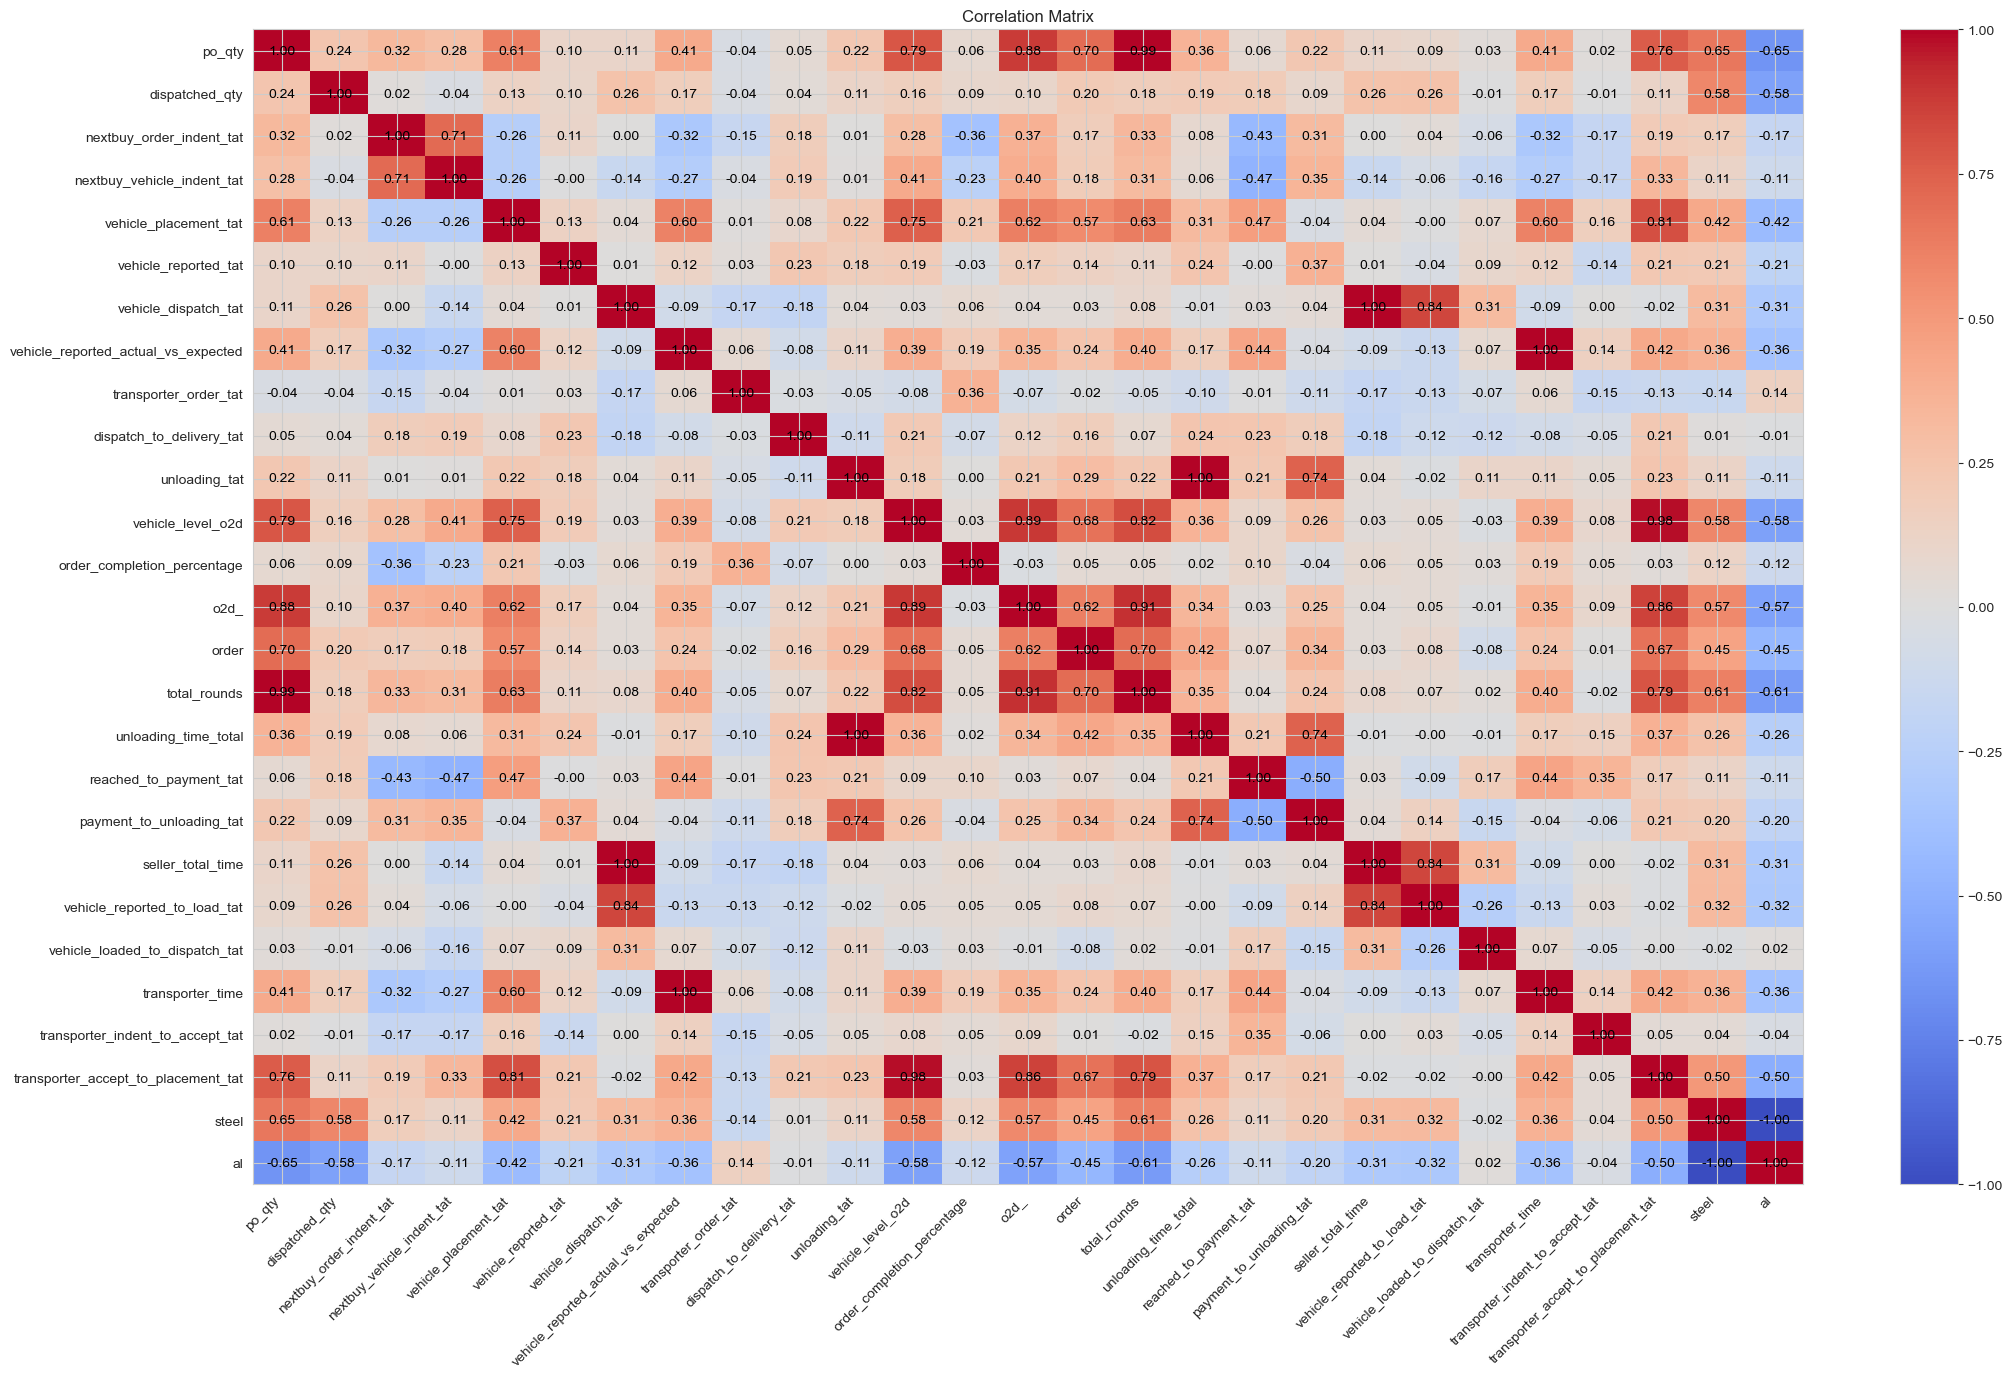

In [719]:
"""
TAT Level corr
"""

selected_cols = ['po_qty', 'dispatched_qty', 'nextbuy_order_indent_tat',
       'nextbuy_vehicle_indent_tat', 'vehicle_placement_tat',
       'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'dispatch_to_delivery_tat', 'unloading_tat', 'vehicle_level_o2d',
       'order_completion_percentage', 'o2d_', 'order', 'total_rounds',
       'unloading_time_total', 'reached_to_payment_tat',
       'payment_to_unloading_tat', 'seller_total_time',
       'vehicle_reported_to_load_tat', 'vehicle_loaded_to_dispatch_tat',
       'transporter_time', 'transporter_indent_to_accept_tat',
       'transporter_accept_to_placement_tat', 'steel', 'al']
# Calculate the correlation matrix
correlation_matrix = df[selected_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(25, 15))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [712]:
when time taken is high for payment, the unloading is fast and vice versa. If we could tell the buyer to be prepared.
When we take fast decisions on payment terms, the reachged_To_payment tat is high, vice versa.



SyntaxError: invalid syntax (1652348495.py, line 1)

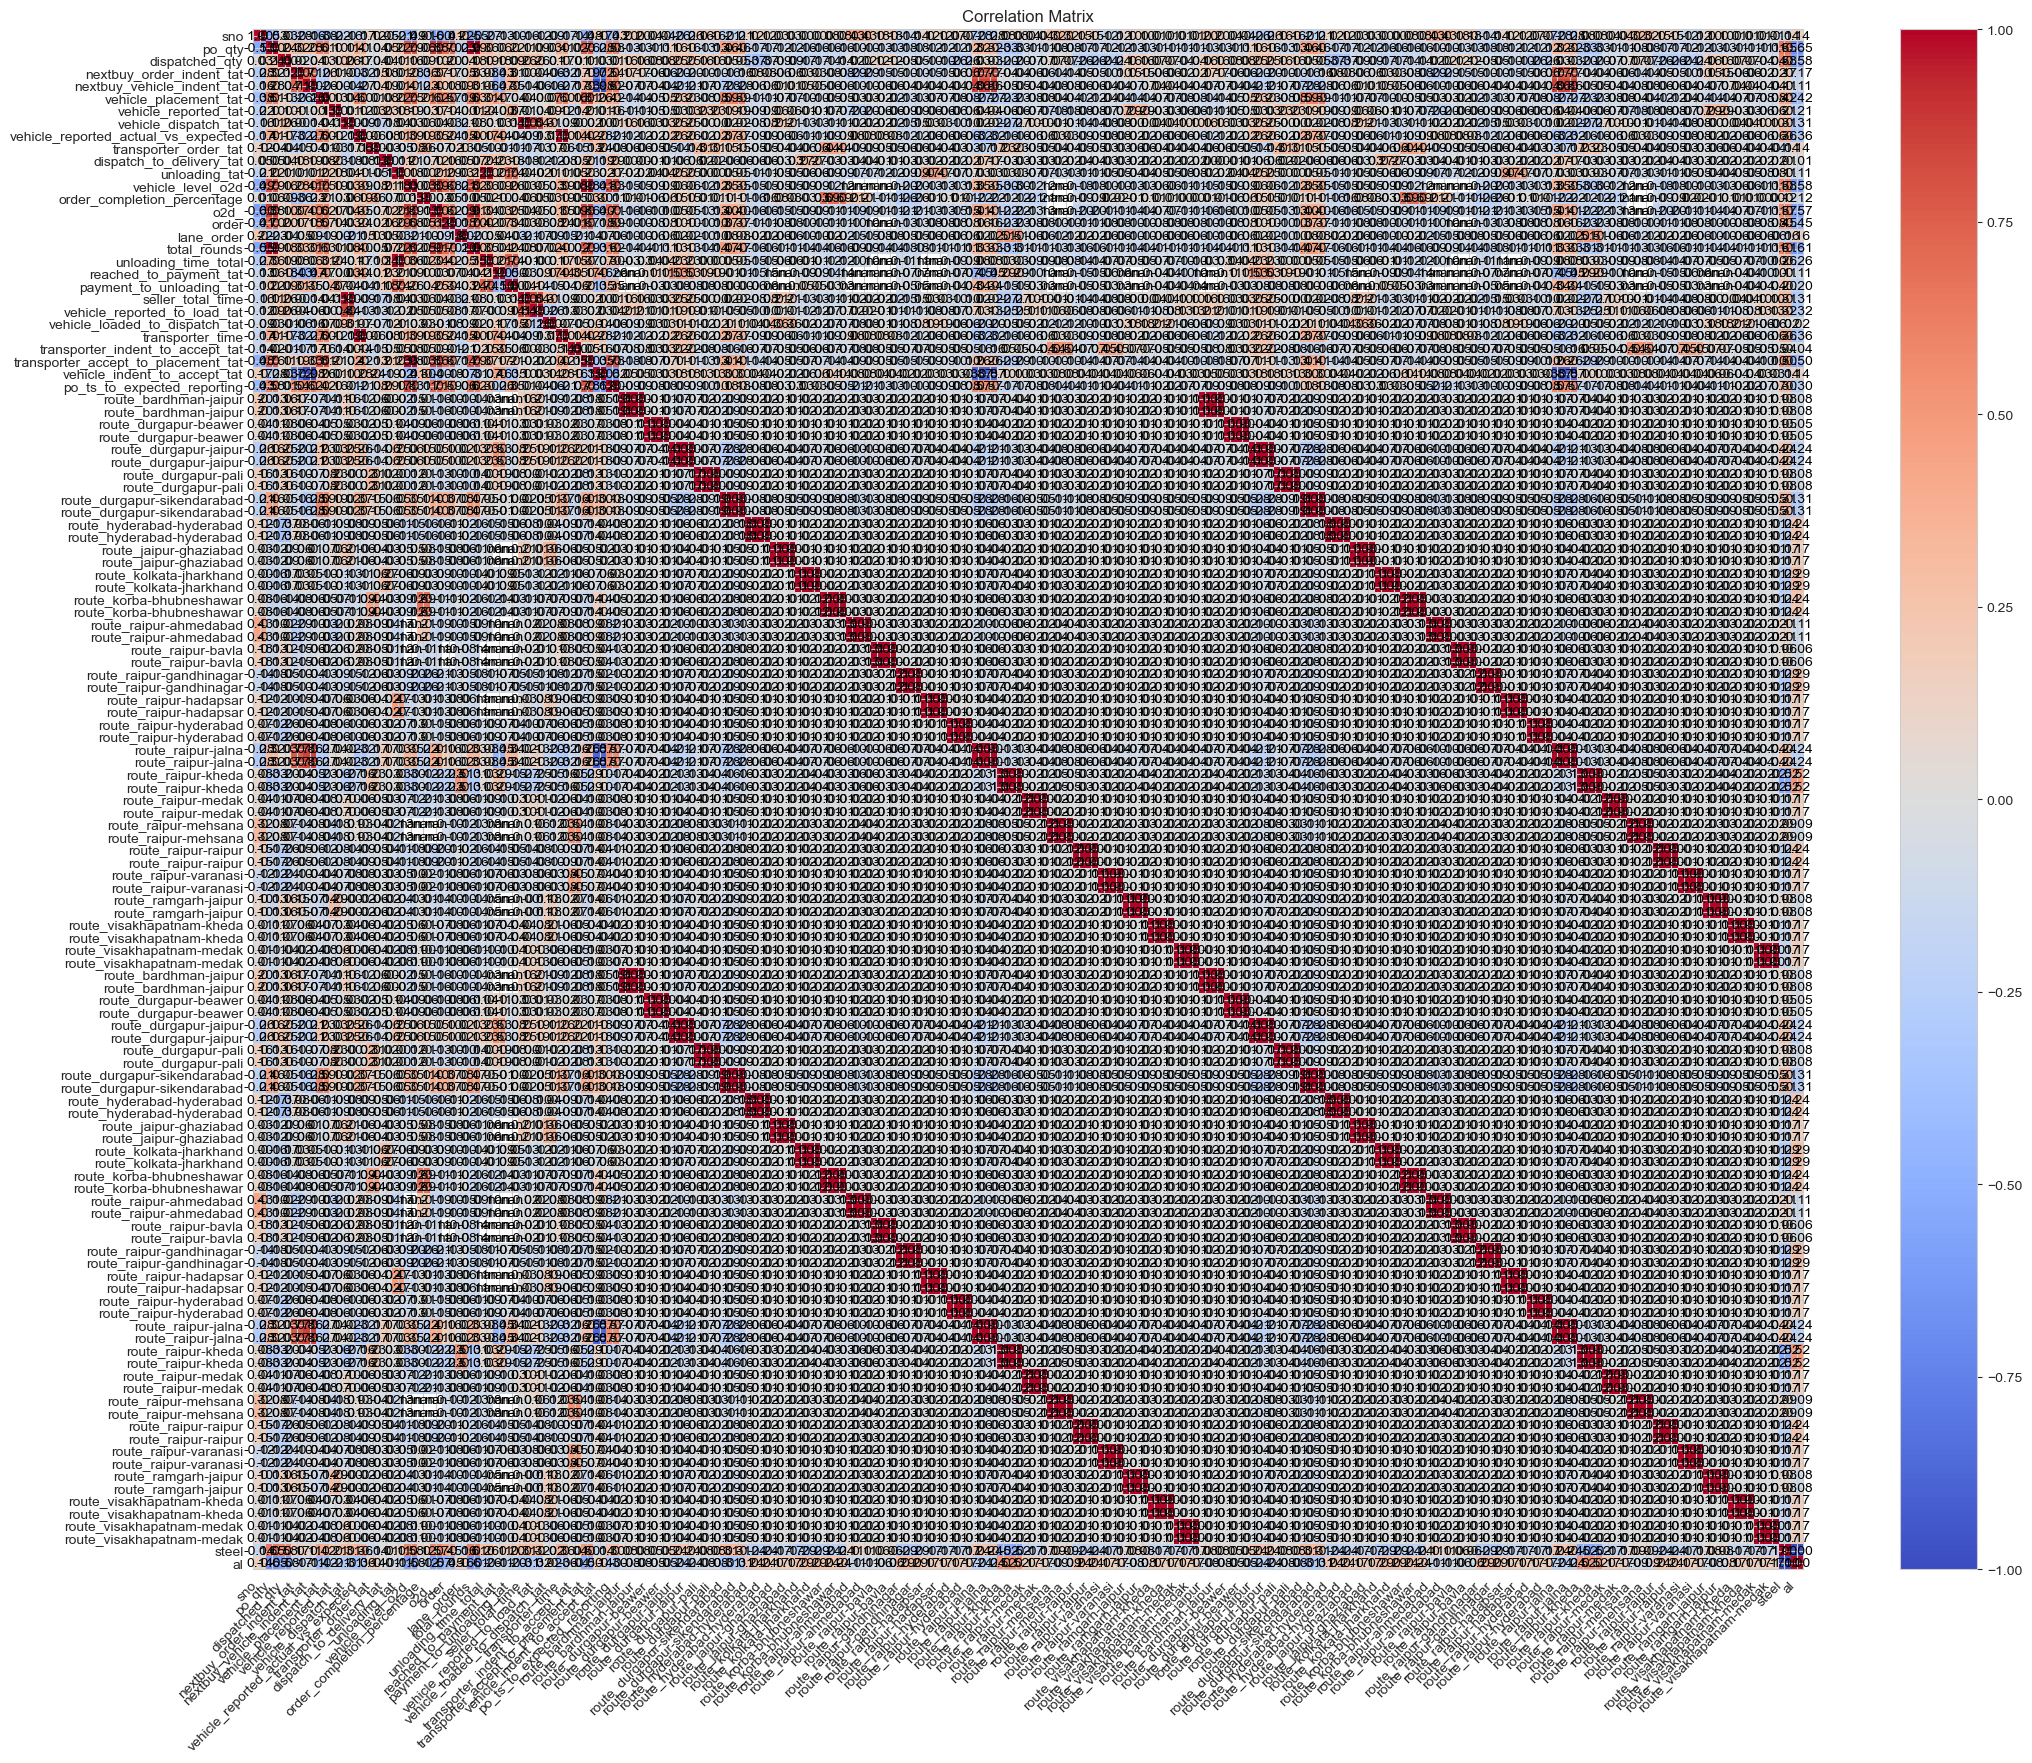

In [720]:
numeric_cols = df.select_dtypes(include=['number']).columns
# df4 = df.groupby('seller_name')[numeric_cols].mean()

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(25, 20))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [ ]:
### Impact of categories on TAT

df.groupby(['Month', 'category'])[['transporter_time', 'o2d_']].mean().T

In [ ]:
# colors = {'RMC - Alu': 'blue', 'Category B': 'red'}

# Plotting
plt.figure(figsize=(6, 4))

for category in df['category'].unique():
    plt.scatter(df[df['category'] == category]['reached_to_payment_tat'],
                df[df['category'] == category]['payment_to_unloading_tat'],
                
                label=category)

plt.title('Scatter Plot of TAT Metrics')
plt.xlabel('Reached to Payment TAT')
plt.ylabel('Payment to Unloading TAT')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

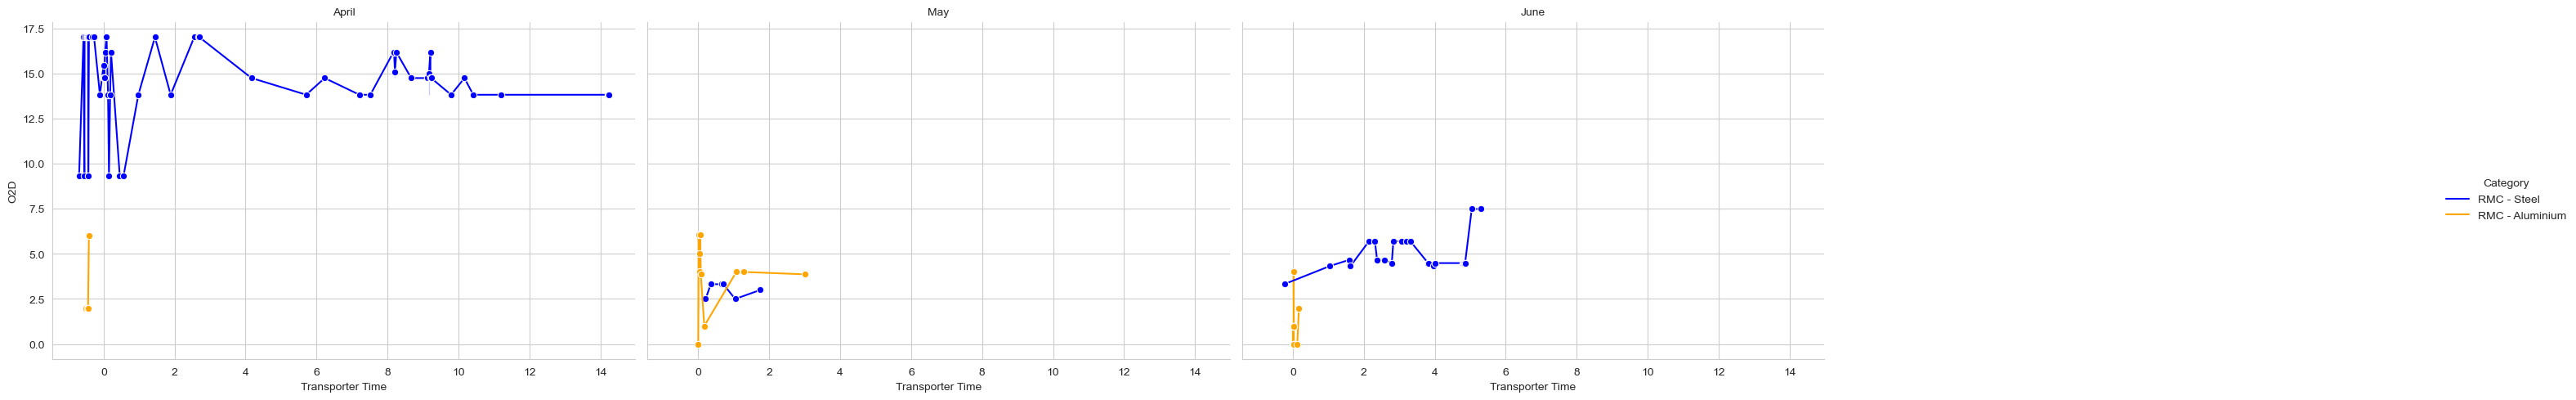

In [713]:
g = sns.FacetGrid(df, col="Month", col_wrap=4, height=5, aspect=1.5)

# Define a function to plot the data
def lineplot(x, y, **kwargs):
    sns.lineplot(x=x, y=y, hue='category', data=kwargs['data'], marker='o',
                 palette={'RMC - Steel': 'blue', 'RMC - Aluminium': 'orange'})

# Plot each metric in the grid
g.map_dataframe(lineplot, x='transporter_time', y='o2d_')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Transporter Time", "O2D")
g.add_legend(title='Category')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


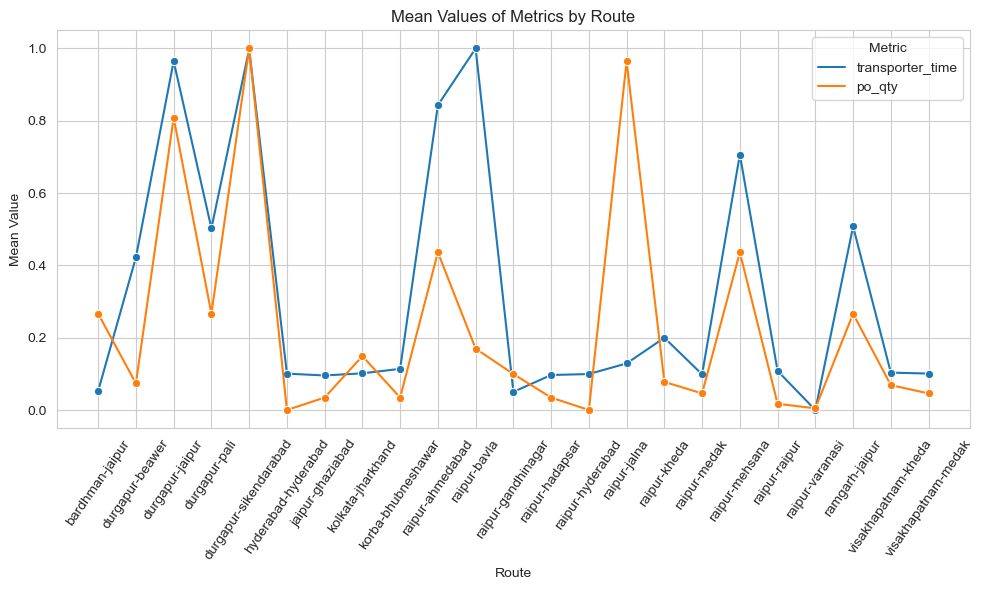

In [714]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()

# Calculate mean values
mean_values = df.groupby('route')[['po_qty', 'transporter_time']].mean().reset_index()

# Normalize the mean values
mean_values_normalized = mean_values.copy()
mean_values_normalized[['po_qty', 'transporter_time']] = scaler.fit_transform(mean_values[['po_qty', 'transporter_time']])

# Melt the DataFrame to make plotting easier
mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], value_vars=[ 'transporter_time', 'po_qty'],
                             var_name='Metric', value_name='Mean Value')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
plt.title('Mean Values of Metrics by Route')
plt.xlabel('Route')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.xticks(rotation=55)

plt.grid(True)
plt.tight_layout()

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


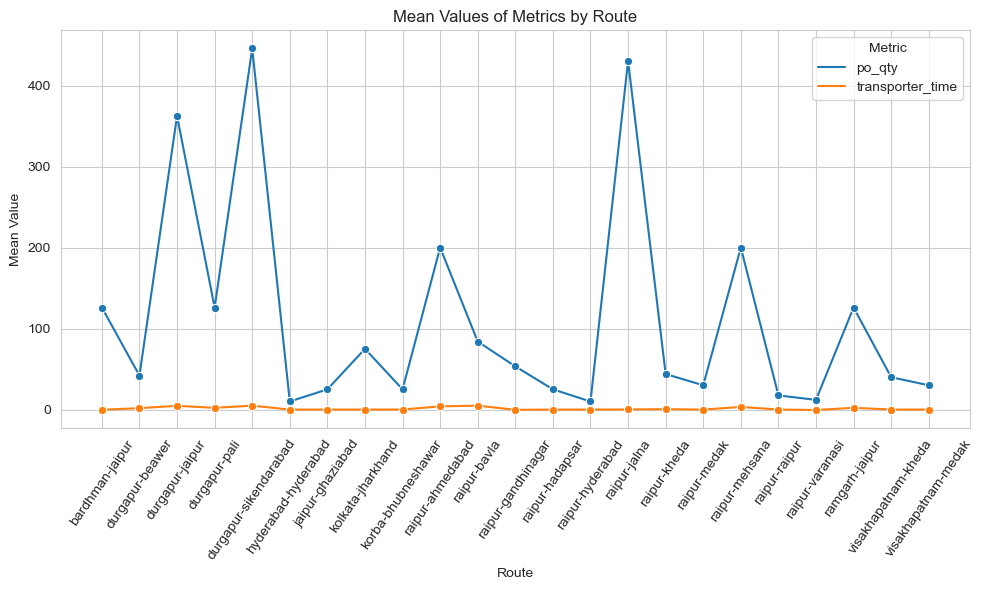

In [715]:
### Route wise


mean_values = df.groupby('route')[['po_qty', 'transporter_time']].mean().reset_index()

# Melt the DataFrame to make plotting easier
mean_values_melted = pd.melt(mean_values, id_vars=['route'], value_vars=['po_qty', 'transporter_time'],
                             var_name='Metric', value_name='Mean Value')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
plt.title('Mean Values of Metrics by Route')
plt.xlabel('Route')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.xticks(rotation = 55)

plt.grid(True)
plt.tight_layout()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

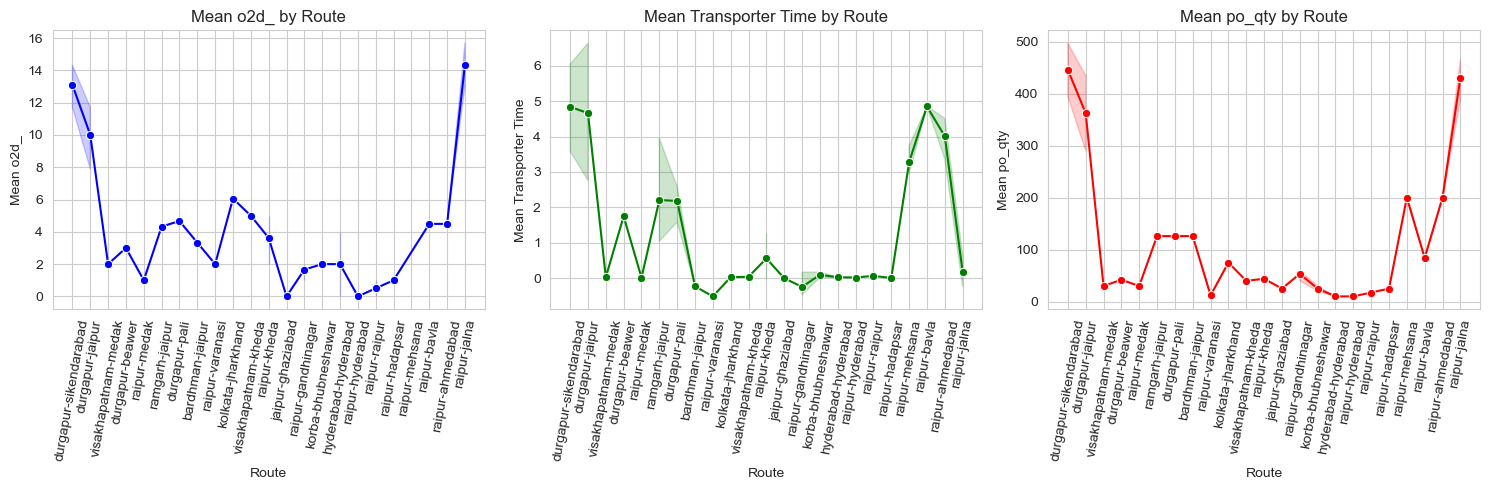

In [716]:
plt.figure(figsize=(15, 5))

# Plot for o2d_
plt.subplot(1, 3, 1)
sns.lineplot(x='route', y='o2d_', data=df, marker='o', color='b')
plt.title('Mean o2d_ by Route')
plt.xlabel('Route')
plt.ylabel('Mean o2d_')
plt.xticks(rotation=80)
plt.grid(True)

# Plot for transporter_time
plt.subplot(1, 3, 2)
sns.lineplot(x='route', y='transporter_time', data=df, marker='o', color='g')
plt.title('Mean Transporter Time by Route')
plt.xlabel('Route')
plt.ylabel('Mean Transporter Time')
plt.xticks(rotation=80)
plt.grid(True)

# Plot for po_qty
plt.subplot(1, 3, 3)
sns.lineplot(x='route', y='po_qty', data=df, marker='o', color='r')
plt.title('Mean po_qty by Route')
plt.xlabel('Route')
plt.ylabel('Mean po_qty')
plt.xticks(rotation=80)
plt.grid(True)

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

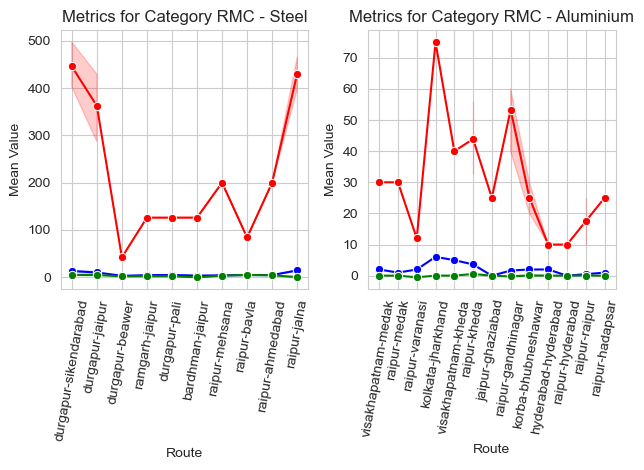

In [717]:
categories = df['category'].unique()

for i, cat in enumerate(categories, start=1):
    plt.subplot(1, len(categories), i)
    sns.lineplot(x='route', y='o2d_', data=df[df['category'] == cat], marker='o', color='b')
    sns.lineplot(x='route', y='transporter_time', data=df[df['category'] == cat], marker='o', color='g')
    sns.lineplot(x='route', y='po_qty', data=df[df['category'] == cat], marker='o', color='r')
    plt.title(f'Metrics for Category {cat}')
    plt.xlabel('Route')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=80)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [718]:
df.pivot_table(index = ['route'], columns = ['Month', 'category'], aggfunc = {'po_qty' : 'mean', 'transporter_time' : 'mean'}).fillna(0).round(2)


po_qty                                          \
Month                           April                        June               
category              RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel   
route                                                                           
bardhman-jaipur                   0.0        0.00            0.00       126.0   
durgapur-beawer                   0.0        0.00            0.00         0.0   
durgapur-jaipur                   0.0      500.00            0.00        84.0   
durgapur-pali                     0.0        0.00            0.00       126.0   
durgapur-sikendarabad             0.0      488.89            0.00       300.0   
hyderabad-hyderabad               0.0        0.00           10.00         0.0   
jaipur-ghaziabad                  0.0        0.00            0.00         0.0   
kolkata-jharkhand                 0.0        0.00            0.00         0.0   
korba-bhubneshawar                0.0        0.00           25.00         0.0   
raipur-ahmedabad                  0.0        0.00            0.00       200.0   
raipur-bavla                      0.0        0.00            0.00        84.0   
raipur-gandhinagar               60.0        0.00            0.00         0.0   
raipur-hadapsar                   0.0        0.00           25.00         0.0   
raipur-hyderabad                  0.0        0.00           10.00         0.0   
raipur-jalna                      0.0      430.43            0.00         0.0   
raipur-kheda                     30.0        0.00           28.75         0.0   
raipur-medak                      0.0        0.00           30.00         0.0   
raipur-mehsana                    0.0        0.00            0.00       200.0   
raipur-raipur                     0.0        0.00           17.50         0.0   
raipur-varanasi                  12.0        0.00            0.00         0.0   
ramgarh-jaipur                    0.0        0.00            0.00       126.0   
visakhapatnam-kheda               0.0        0.00            0.00         0.0   
visakhapatnam-medak               0.0        0.00            0.00         0.0   

                                                  transporter_time  \
Month                             May                        April   
category              RMC - Aluminium RMC - Steel  RMC - Aluminium   
route                                                                
bardhman-jaipur                   0.0        0.00             0.00   
durgapur-beawer                   0.0       42.00             0.00   
durgapur-jaipur                   0.0      166.86             0.00   
durgapur-pali                     0.0        0.00             0.00   
durgapur-sikendarabad             0.0        0.00             0.00   
hyderabad-hyderabad               0.0        0.00             0.00   
jaipur-ghaziabad                 25.0        0.00             0.00   
kolkata-jharkhand                75.0        0.00             0.00   
korba-bhubneshawar                0.0        0.00             0.00   
raipur-ahmedabad                  0.0        0.00             0.00   
raipur-bavla                      0.0        0.00             0.00   
raipur-gandhinagar               40.0        0.00            -0.45   
raipur-hadapsar                   0.0        0.00             0.00   
raipur-hyderabad                  0.0        0.00             0.00   
raipur-jalna                      0.0        0.00             0.00   
raipur-kheda                     62.5        0.00            -0.41   
raipur-medak                      0.0        0.00             0.00   
raipur-mehsana                    0.0        0.00             0.00   
raipur-raipur                     0.0        0.00             0.00   
raipur-varanasi                   0.0        0.00            -0.51   
ramgarh-jaipur                    0.0        0.00             0.00   
visakhapatnam-kheda              40.0        0.00             0.00   
visakhapatnam-medak    

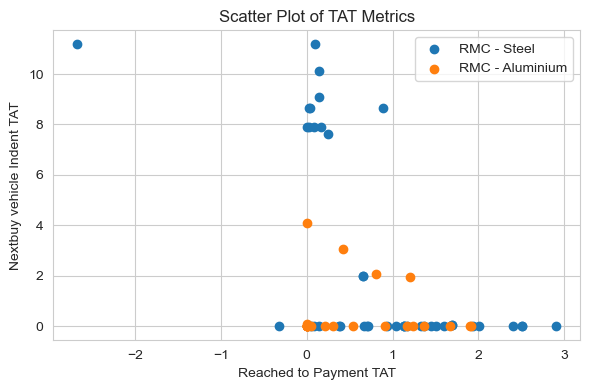

In [630]:
# colors = {'RMC - Alu': 'blue', 'Category B': 'red'}

# Plotting
plt.figure(figsize=(6, 4))

for category in df['category'].unique():
    plt.scatter(df[df['category'] == category]['reached_to_payment_tat'],
                df[df['category'] == category]['nextbuy_vehicle_indent_tat'],
                
                label=category)

plt.title('Scatter Plot of TAT Metrics')
plt.xlabel('Reached to Payment TAT')
plt.ylabel('Nextbuy vehicle Indent TAT')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

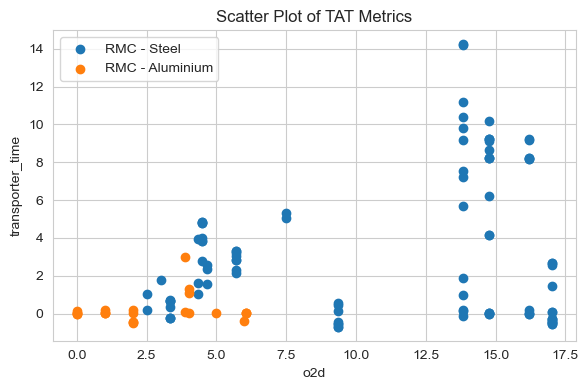

In [631]:
# colors = {'RMC - Alu': 'blue', 'Category B': 'red'}

# Plotting
plt.figure(figsize=(6, 4))

for category in df['category'].unique():
    plt.scatter(df[df['category'] == category]['o2d_'],
                df[df['category'] == category]['transporter_time'],
                
                label=category)

plt.title('Scatter Plot of TAT Metrics')
plt.xlabel('o2d')
plt.ylabel('transporter_time')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [632]:
"""
If the transporter_time is high, the O2D is going to be higher incase of Steel.
"""

'\nIf the transporter_time is high, the O2D is going to be higher incase of Steel.\n'

In [633]:
# """
# If we can reduce the time taken by transporter from Transporter Order Acceptance to Vehicle Placement, 
# we can significantly lower the O2D.
# """

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

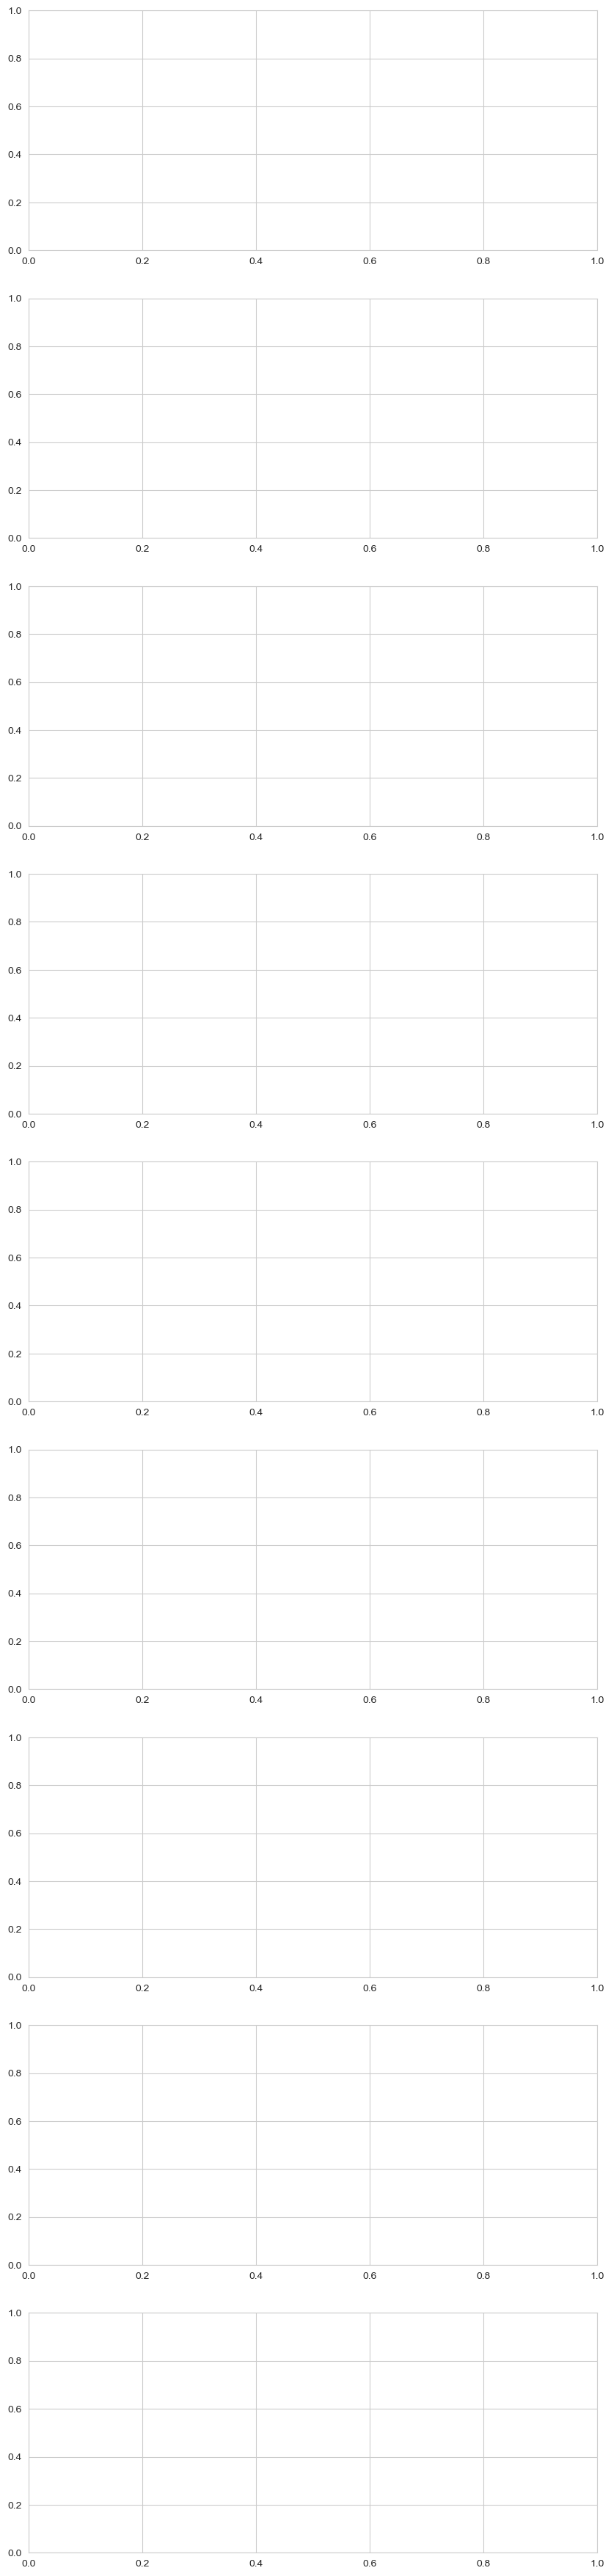

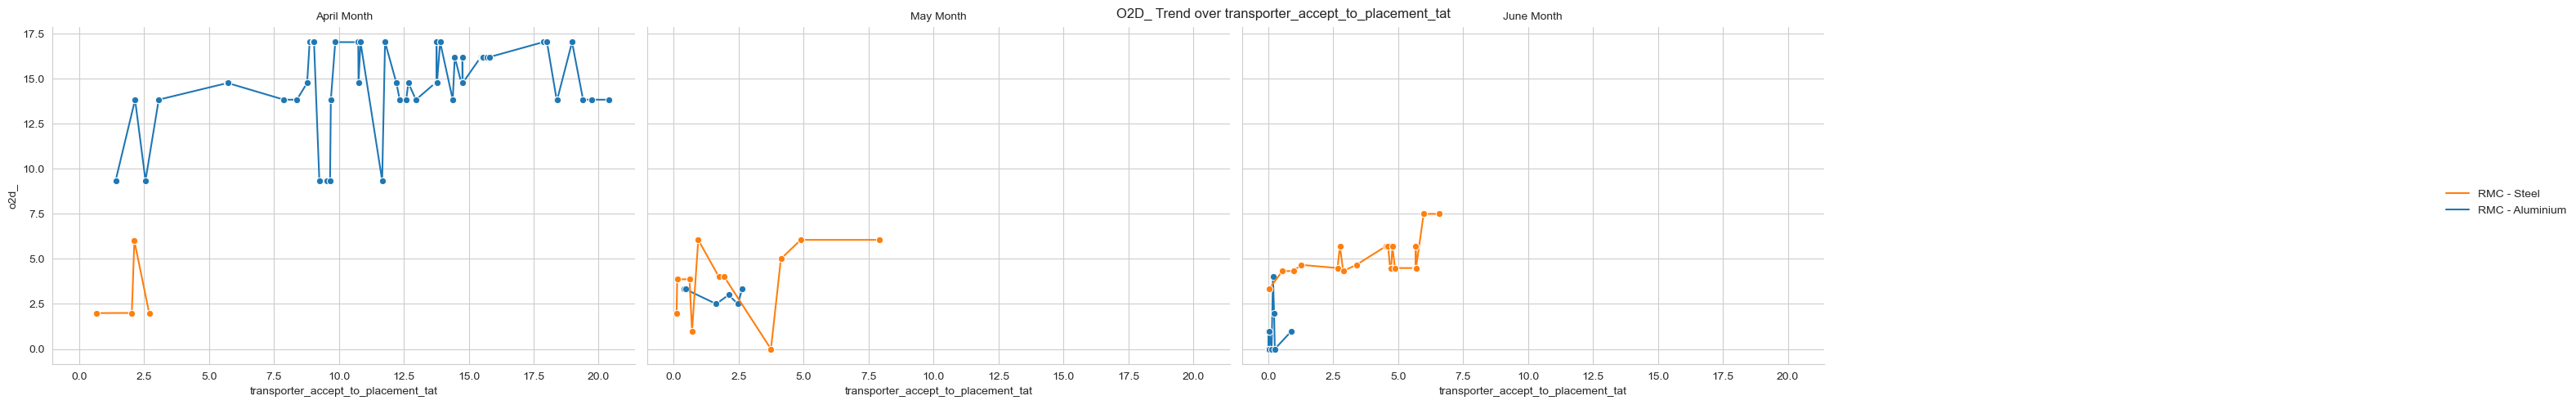

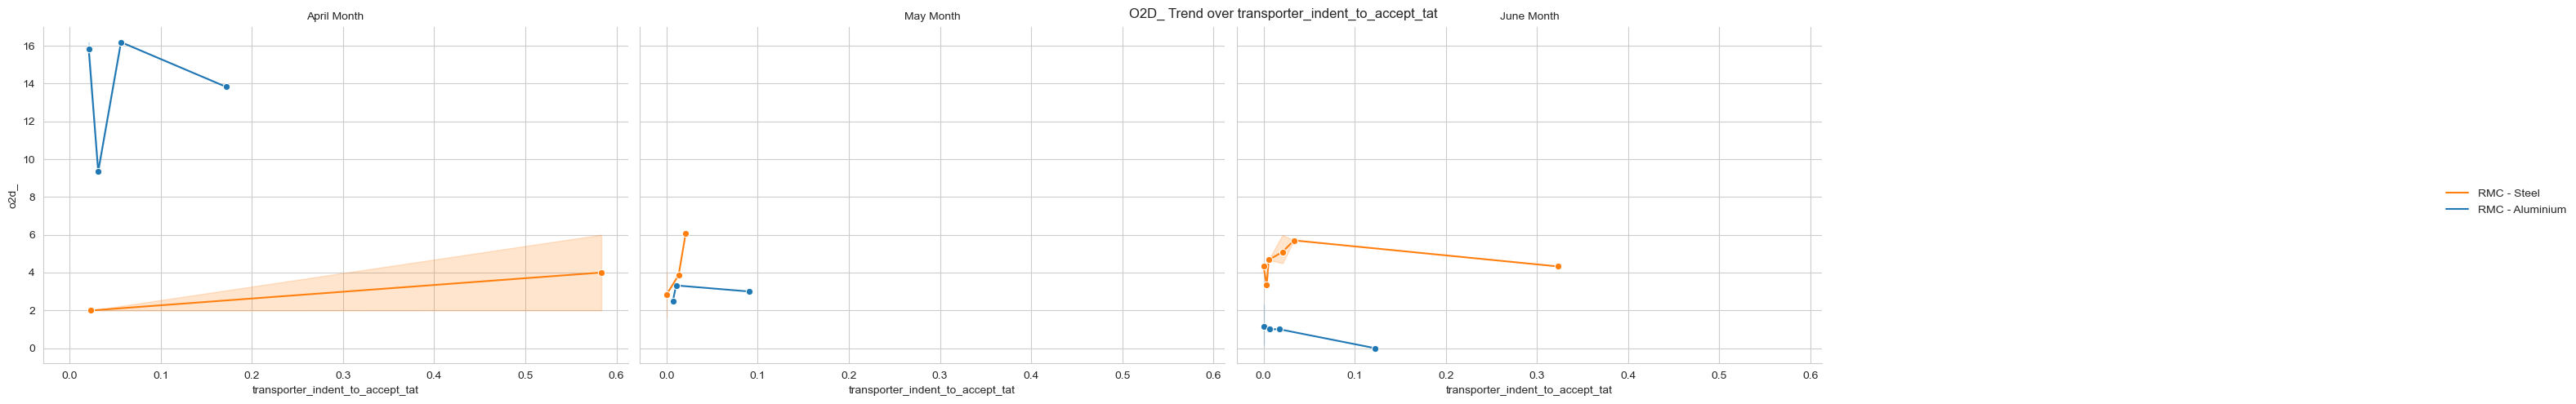

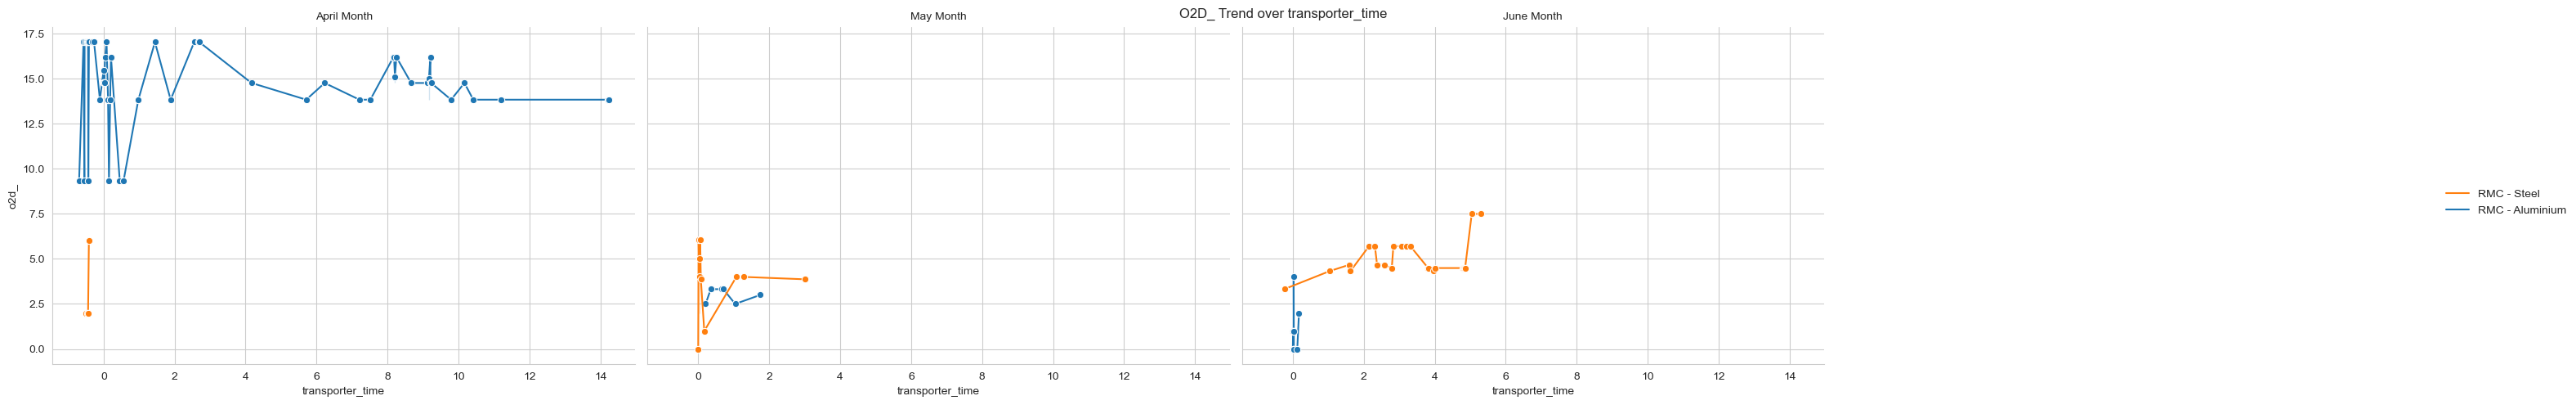

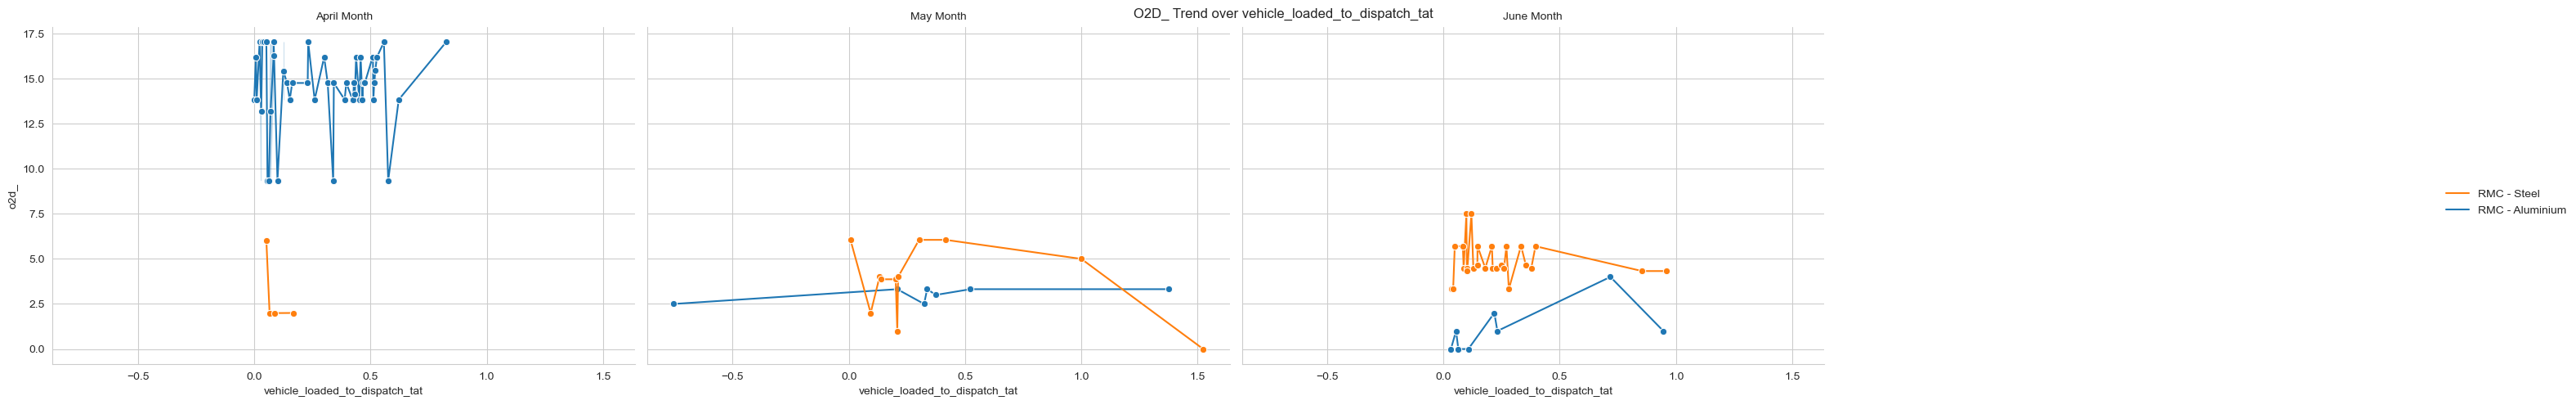

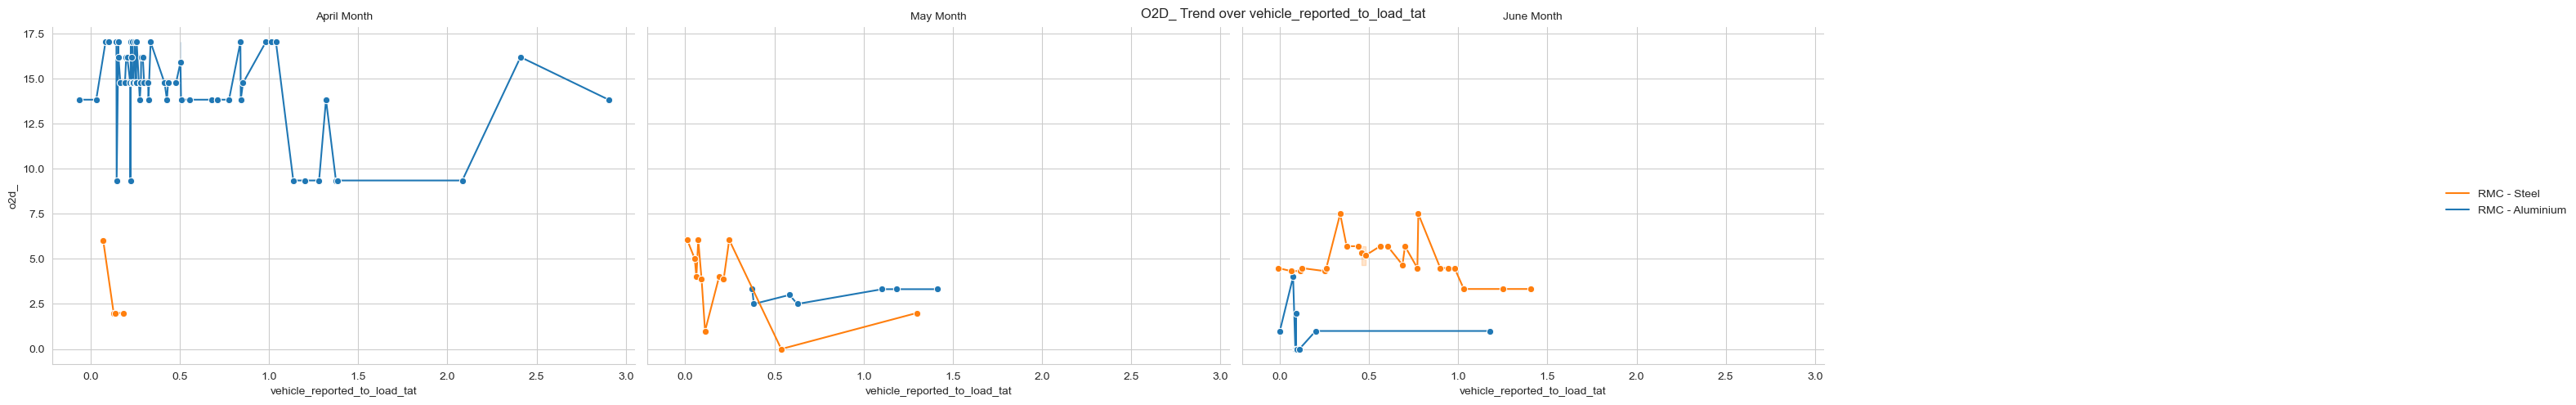

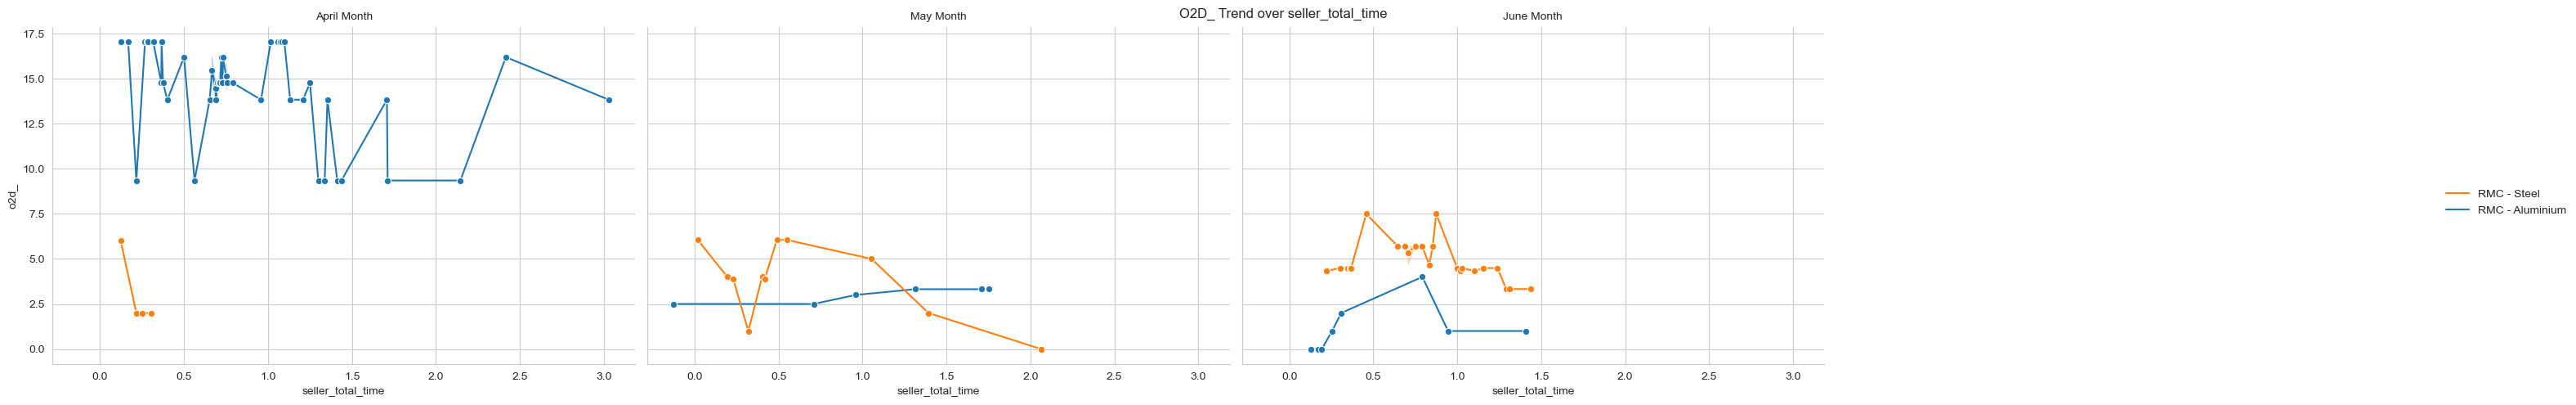

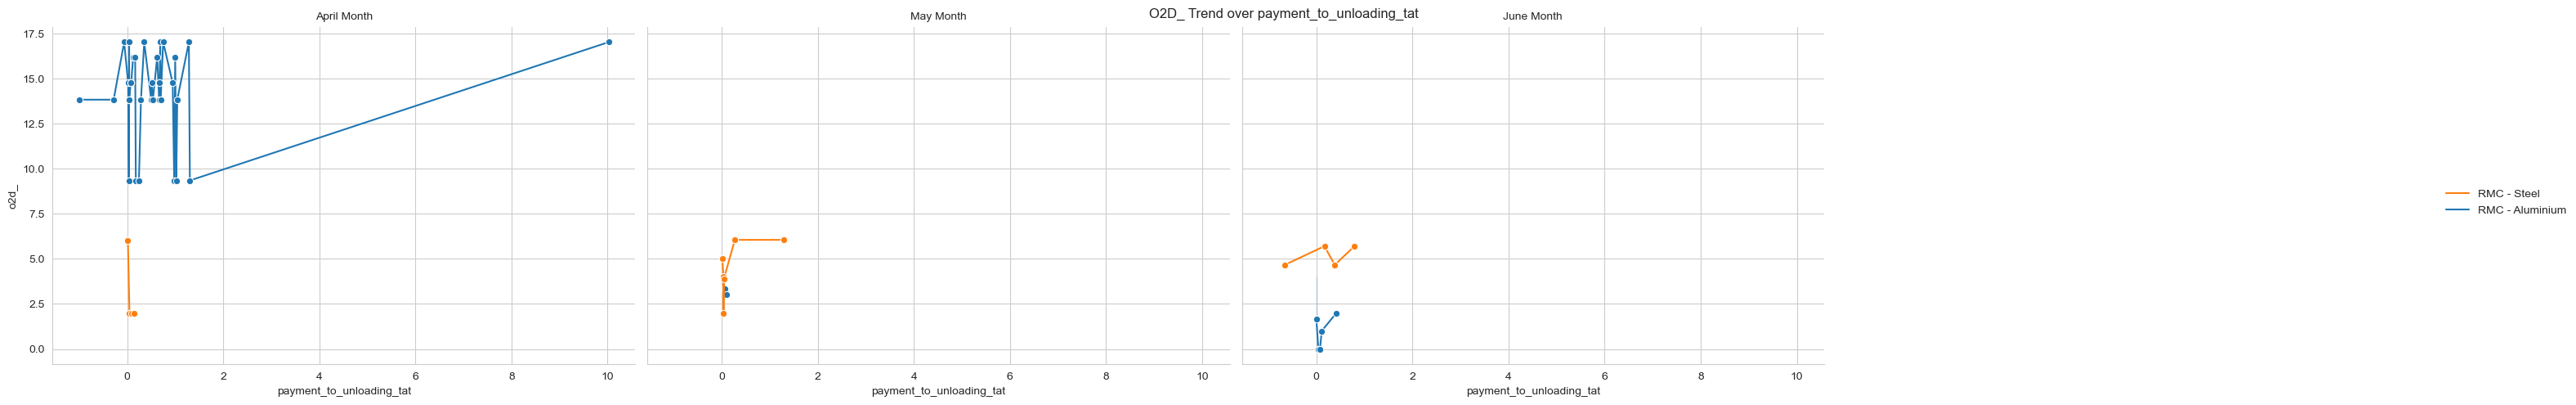

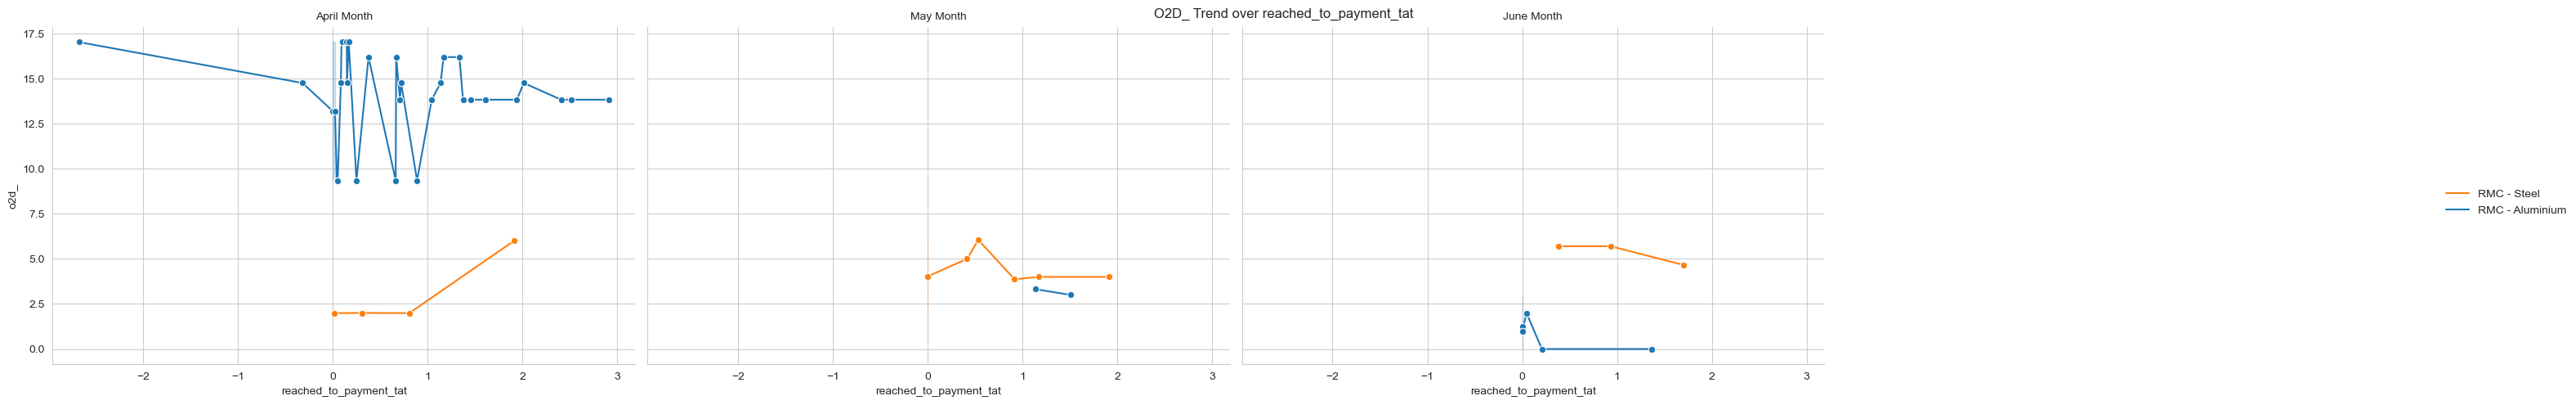

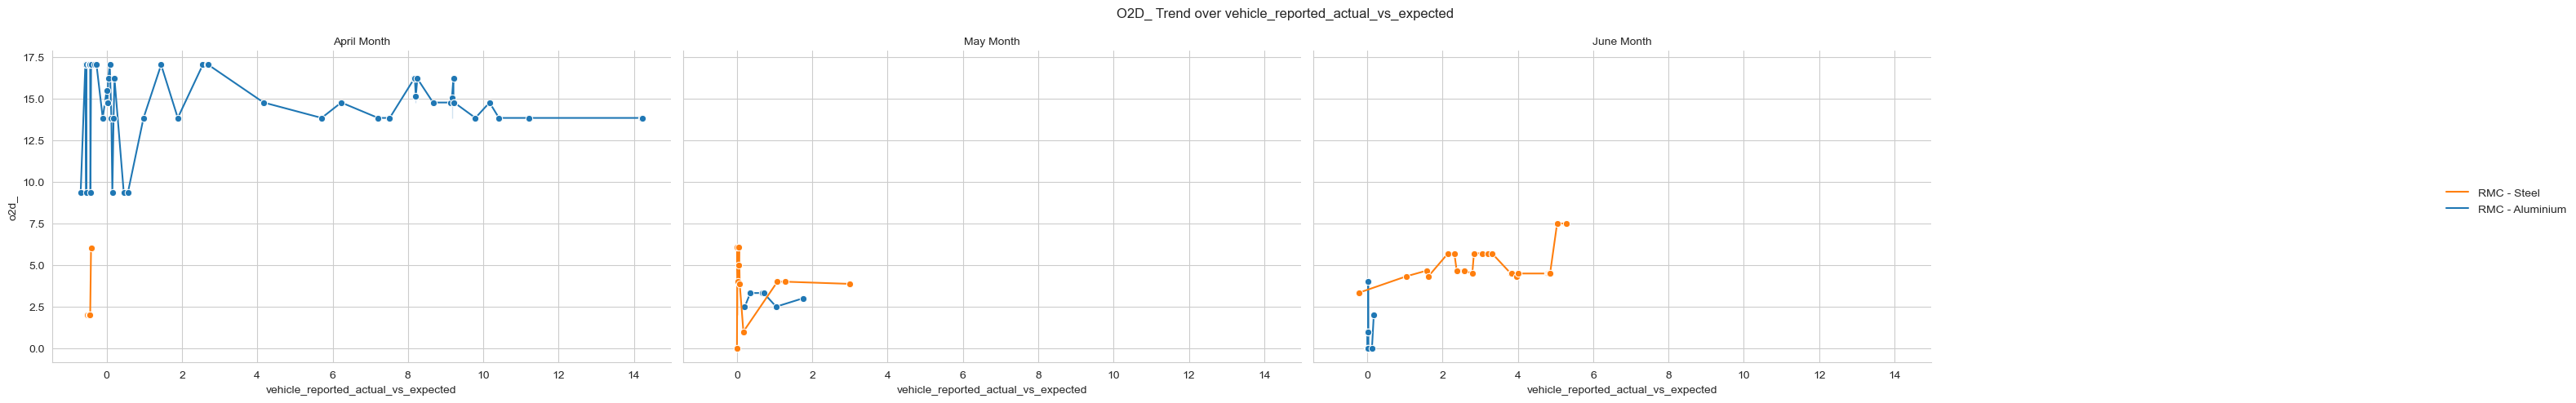

In [634]:
metrics = [
    'transporter_accept_to_placement_tat', 'transporter_indent_to_accept_tat',
    'transporter_time', 'vehicle_loaded_to_dispatch_tat', 'vehicle_reported_to_load_tat',
    'seller_total_time', 'payment_to_unloading_tat', 'reached_to_payment_tat', 'vehicle_reported_actual_vs_expected'
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 5))

for i, metric in enumerate(metrics):
    g = sns.FacetGrid(df, col="Month", col_wrap=4, height=5, aspect=1.5)
    g.map_dataframe(sns.lineplot, x=metric, y='o2d_', hue='category', marker='o')
    g.set_titles(col_template="{col_name} Month")
    g.set_axis_labels(metric, "o2d_")
    g.add_legend()
    plt.subplots_adjust()
    g.fig.suptitle(f'O2D_ Trend over {metric}')

plt.tight_layout()
plt.show()


In [635]:
route_df = df[['o2d_', 'transporter_time', 'vehicle_reported_to_load_tat',
       'vehicle_loaded_to_dispatch_tat', 'route_bardhaman-jaipur',
       'route_bardhman-jaipur', 'route_champa-ahmndabad', 'route_champa-bhyla',
       'route_durgapur-beawer', 'route_durgapur-jaipur', 'route_durgapur-pali',
       'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_korba-bhubneshawar', 'route_korba-halda', 'route_korba-haldia',
       'route_raipur-gandhinagar', 'route_raipur-hadapsar',
       'route_raipur-hyderabad', 'route_raipur-jalna', 'route_raipur-kheda',
       'route_raipur-medak', 'route_raipur-mehsana', 'route_raipur-raipur',
       'route_raipur-varanasi', 'route_ramgarh-jaipur',
       'route_visakhapatnam-kheda', 'route_visakhapatnam-medak', 'route','po_qty', 'Month', 'category']]

# route_df = route_df.astype(float)
route_df1 = route_df[route_df.columns]
route_df[route_df.columns] = route_df[route_df.columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = route_df.corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(25, 15))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

KeyError: "['route_bardhaman-jaipur', 'route_champa-ahmndabad', 'route_champa-bhyla', 'route_korba-halda', 'route_korba-haldia'] not in index"

In [ ]:
route_df1.pivot_table(index = ['route'], columns = ['Month', 'category'], aggfunc = {'po_qty' : 'mean', 'o2d_' : 'mean', ''}).fillna(0).round(2)


# Transporter Level 

In [ ]:
"""
Focusing on the time taken at the Transportation level and how its impacting the O2D

Metric : Time taken on the transporter level
formula : 'vehicle_reported_actual_vs_expected'

"""

In [ ]:
t = df[['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin', 'destination', 'o2d_', 
        'nextbuy_vehicle_indent_tat', 'vehicle_reported_tat', 'vehicle_placement_tat', 'vehicle_reported_actual_vs_expected',
          'nextbuy_vehicle_indent_ts', 'vehicle_reported_ts', 'vehicle_placement_ts',
          'transporter_order_indent_ts', 'transporter_order_indent_acceptance_ts', 'buyer_name', 'seller_name', 
           'order', 'route', 'Month', 'total_rounds', 'transporter_time']]

In [ ]:
tat_cols = ['o2d_', 'transporter_time','po_qty']
t.groupby(['Month', 'category'])[tat_cols].mean().T

In [ ]:
see the correlated features.
Then find corr at transporter level

pattern with o2d greater than 6 and less than 6.
see with payment methods

In [ ]:
Also see why's june has more o2d than may? april>june>may

In [ ]:
df.shape

In [ ]:
pd.crosstab(df['category'],df['order_type'])

In [ ]:
1. internal level
2. day-wise o2d. there are cases where 1st vehicle dispatch is early whereas last dispatch takes lots of time.
2. transportation
3. seller
4. order_type


In [ ]:
df.pivot_table(index = ['order_type'], columns = ['Month', 'category'], aggfunc = {'transporter_time' : 'mean', 'po_qty' : 'mean', 'o2d_' : 'mean'}).round(2)



In [ ]:
route_count = df.groupby('route')['po_number'].nunique().reset_index()
router = route_count[route_count['po_number'] > 1]['route']

df['lane_order'] = df.groupby('route')['po_ts'].rank(method='min')
df['lane_order'] = df['lane_order'].fillna(1).astype(int)
df.loc[~df['route'].isin(router), 'lane_order'] = 1

may_june_df = df[df['Month'] != 'April']
may_june_df.pivot_table(index = ['lane_order', 'route'],  aggfunc = { 'o2d_' :'mean', 'transporter_time' : 'mean'}).fillna(0).round(2).reset_index().sort_values(by=['lane_order', 'transporter_time'], ascending=[True, False])

# df.pivot_table(index = ['lane_order', 'route'],  aggfunc = { 'o2d_' :'mean', 'transporter_time' : 'mean', 'seller_total_time' : 'mean'}).fillna(0).round(2).reset_index().sort_values(by=['lane_order', 'transporter_time'], ascending=[True, False])


In [ ]:
june = df[df['Month'] == 'June']
May = df[df['Month'] == 'May']


In [ ]:
df4 = df[df['Month'] != 'April']

numeric_cols = df4.select_dtypes(include=[np.number]).columns
df4[df4[numeric_cols]<0] = 0
df4.groupby(['category','Month'])[['transporter_time', 'transporter_indent_to_accept_tat', 'transporter_accept_to_placement_tat', 'o2d_', 'po_qty']].mean().T

In [ ]:
mean_o2d = df.groupby('po_number')['o2d_'].mean().reset_index()

good_po = df[df['o2d_']<=6]['po_number']
bad_po = df[df['o2d_']>6]['po_number']


good_df = df[df['po_number'].isin(good_po)]
bad_df = df[df['po_number'].isin(bad_po)]


numeric_cols = good_df.select_dtypes(include=[np.number]).columns
good_df[good_df[numeric_cols]<0] = 0
good_df.groupby('category')[['transporter_time', 'transporter_indent_to_accept_tat', 'transporter_accept_to_placement_tat', 'o2d_', 'po_qty']].mean().T



In [ ]:
numeric_cols = bad_df.select_dtypes(include=[np.number]).columns
bad_df[bad_df[numeric_cols]<0] = 0
bad_df.groupby('category')[['transporter_time', 'transporter_indent_to_accept_tat', 'transporter_accept_to_placement_tat', 'o2d_', 'po_qty']].mean().T


## Time series analysis

In [ ]:
df['dispatch_week'] = pd.to_datetime(df['vehicle_dispatched_ts'], errors='coerce')
time_series_data = df.groupby(df['dispatch_week'].dt.to_period('W'))['vehicle_level_o2d'].mean()


In [ ]:
df['dispatch_week'] = pd.to_datetime(df['vehicle_dispatched_ts'], errors='coerce')
time_series_data = df.groupby(df['dispatch_week'].dt.to_period('W'))['vehicle_level_o2d'].mean()

plt.figure(figsize=(12, 6))
time_series_data.plot(marker='o')
plt.title('Time Series Analysis of O2D')
plt.xlabel('Dispatch Week')
plt.ylabel('Mean O2D')
plt.grid(True)
plt.show()


In [ ]:
### Origins with high corelation

durgapur_data = df[df['origin'] == 'Durgapur']
raipur_data = df[df['origin'] == 'Raipur']

durgapur_stats = durgapur_data.describe()
raipur_stats = raipur_data.describe()

time_related_columns = [
    'nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat', 'vehicle_placement_tat',
    'vehicle_reported_tat', 'vehicle_dispatch_tat', 'vehicle_reported_actual_vs_expected',
    'transporter_order_tat', 'dispatch_to_delivery_tat', 'unloading_tat'
]

durgapur_correlation = durgapur_data[time_related_columns + ['vehicle_level_o2d']].corr()['vehicle_level_o2d'].sort_values(ascending=False)
raipur_correlation = raipur_data[time_related_columns + ['vehicle_level_o2d']].corr()['vehicle_level_o2d'].sort_values(ascending=False)

print(durgapur_correlation)
print(raipur_correlation)


## Hypothesis : The O2D_ is majorly dependent on po_qty than lane, category, etc.

In [636]:
df.pivot_table(index = 'route', columns = ['category'], aggfunc = {'o2d_' : 'mean', 'po_qty' : 'mean'}).round(2)

o2d_                      po_qty            
category              RMC - Aluminium RMC - Steel RMC - Aluminium RMC - Steel
route                                                                        
bardhman-jaipur                   NaN        3.33             NaN      126.00
durgapur-beawer                   NaN        3.00             NaN       42.00
durgapur-jaipur                   NaN       10.01             NaN      362.43
durgapur-pali                     NaN        4.67             NaN      126.00
durgapur-sikendarabad             NaN       13.10             NaN      445.71
hyderabad-hyderabad              2.00         NaN           10.00         NaN
jaipur-ghaziabad                 0.00         NaN           25.00         NaN
kolkata-jharkhand                6.06         NaN           75.00         NaN
korba-bhubneshawar               2.00         NaN           25.00         NaN
raipur-ahmedabad                  NaN        4.49             NaN      200.00
raipur-bavla                      NaN        4.49             NaN       84.00
raipur-gandhinagar               1.66         NaN           53.33         NaN
raipur-hadapsar                  1.00         NaN           25.00         NaN
raipur-hyderabad                 0.00         NaN           10.00         NaN
raipur-jalna                      NaN       14.36             NaN      430.43
raipur-kheda                     3.62         NaN           43.89         NaN
raipur-medak                     1.00         NaN           30.00         NaN
raipur-mehsana                    NaN         NaN             NaN      200.00
raipur-raipur                    0.50         NaN           17.50         NaN
raipur-varanasi                  2.00         NaN           12.00         NaN
ramgarh-jaipur                    NaN        4.33             NaN      126.00
visakhapatnam-kheda              5.00         NaN           40.00         NaN
visakhapatnam-medak              2.00         NaN           30.00         NaN

In [656]:
df['Month_filter'] = df['Month'].apply(lambda x : 'Other than April' if x != 'April' else 'April')
df.groupby([ 'category','Month_filter'])[['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "vehicle_indent_to_accept_tat", "transporter_time",
           "transporter_indent_to_accept_tat", "transporter_accept_to_placement_tat", 
           "vehicle_loaded_to_dispatch_tat"]].mean().T




category                            RMC - Aluminium                   \
Month_filter                                  April Other than April   
o2d_                                       2.996201         2.545158   
po_qty                                    40.500000        37.291667   
nextbuy_order_indent_tat                   0.672419         0.353828   
nextbuy_vehicle_indent_tat                 0.517894         0.912444   
vehicle_indent_to_accept_tat              -0.194965        -0.286449   
transporter_time                          -0.457292         0.258553   
transporter_indent_to_accept_tat           0.303125         0.009259   
transporter_accept_to_placement_tat        1.881250         1.201071   
vehicle_loaded_to_dispatch_tat             0.093229         0.329340   

category                            RMC - Steel                   
Month_filter                              April Other than April  
o2d_                                  14.636520         4.517551  
po_qty                               470.312500       181.538462  
nextbuy_order_indent_tat               1.204942         0.311052  
nextbuy_vehicle_indent_tat             2.964519         0.014115  
vehicle_indent_to_accept_tat          -2.688737         0.381285  
transporter_time                       3.795367         2.531560  
transporter_indent_to_accept_tat       0.060080         0.063616  
transporter_accept_to_placement_tat   12.338035         3.092593  
vehicle_loaded_to_dispatch_tat         0.288977         0.275516

In [648]:

df.groupby([ 'category','Month'])[['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "vehicle_indent_to_accept_tat", "transporter_time",
           "transporter_indent_to_accept_tat", "transporter_accept_to_placement_tat", 
           "vehicle_loaded_to_dispatch_tat"]].mean().T


df['category'].mean()

category                            RMC - Aluminium                        \
Month                                         April       June        May   
o2d_                                       2.996201   1.000000   3.809377   
po_qty                                    40.500000  21.923077  55.454545   
nextbuy_order_indent_tat                   0.672419   0.252629   0.473427   
nextbuy_vehicle_indent_tat                 0.517894   0.155994   1.806430   
vehicle_indent_to_accept_tat              -0.194965   0.470726  -1.181292   
transporter_time                          -0.457292   0.034016   0.523915   
transporter_indent_to_accept_tat           0.303125   0.011271   0.006881   
transporter_accept_to_placement_tat        1.881250   0.150053   2.443182   
vehicle_loaded_to_dispatch_tat             0.093229   0.282212   0.385038   

category                            RMC - Steel                          
Month                                     April        June         May  
o2d_                                  14.636520    4.945127    3.074483  
po_qty                               470.312500  189.354839  151.250000  
nextbuy_order_indent_tat               1.204942    0.194910    0.761102  
nextbuy_vehicle_indent_tat             2.964519    0.017754    0.000014  
vehicle_indent_to_accept_tat          -2.688737    0.471259    0.032636  
transporter_time                       3.795367    2.989303    0.757804  
transporter_indent_to_accept_tat       0.060080    0.075000    0.019502  
transporter_accept_to_placement_tat   12.338035    3.551366    1.314844  
vehicle_loaded_to_dispatch_tat         0.288977    0.225246    0.470313

In [651]:

df.groupby([ 'category'])[['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "vehicle_indent_to_accept_tat", "transporter_time",
           "transporter_indent_to_accept_tat", "transporter_accept_to_placement_tat", 
           "vehicle_loaded_to_dispatch_tat"]].mean().T

category                             RMC - Aluminium  RMC - Steel
o2d_                                        2.620331    11.059107
po_qty                                     37.750000   360.970874
nextbuy_order_indent_tat                    0.399341     0.866479
nextbuy_vehicle_indent_tat                  0.856080     1.847376
vehicle_indent_to_accept_tat               -0.273380    -1.526301
transporter_time                            0.156290     3.316838
transporter_indent_to_accept_tat            0.051240     0.061419
transporter_accept_to_placement_tat         1.298239     8.837333
vehicle_loaded_to_dispatch_tat              0.295610     0.283880

In [652]:

df[df['route'] == 'raipur-kheda'].groupby([ 'category'])[['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "vehicle_indent_to_accept_tat", "transporter_time",
           "transporter_indent_to_accept_tat", "transporter_accept_to_placement_tat", 
           "vehicle_loaded_to_dispatch_tat"]].mean().T

category                             RMC - Aluminium
o2d_                                        3.622715
po_qty                                     43.888889
nextbuy_order_indent_tat                    0.607334
nextbuy_vehicle_indent_tat                  0.954564
vehicle_indent_to_accept_tat                0.098997
transporter_time                            0.559095
transporter_indent_to_accept_tat            0.079861
transporter_accept_to_placement_tat         0.745062
vehicle_loaded_to_dispatch_tat              0.231636

In [654]:
df[(df['route'] != 'raipur-kheda')].groupby([ 'category'])[['o2d_', 'po_qty', "nextbuy_order_indent_tat",
           "nextbuy_vehicle_indent_tat", "vehicle_indent_to_accept_tat", "transporter_time",
           "transporter_indent_to_accept_tat", "transporter_accept_to_placement_tat", 
           "vehicle_loaded_to_dispatch_tat"]].mean().T

category                             RMC - Aluminium  RMC - Steel
o2d_                                        2.286204    11.059107
po_qty                                     34.842105   360.970874
nextbuy_order_indent_tat                    0.300818     0.866479
nextbuy_vehicle_indent_tat                  0.809429     1.847376
vehicle_indent_to_accept_tat               -0.449769    -1.526301
transporter_time                           -0.034513     3.316838
transporter_indent_to_accept_tat            0.037683     0.061419
transporter_accept_to_placement_tat         1.560270     8.837333
vehicle_loaded_to_dispatch_tat              0.325914     0.283880

In [ ]:
df[df['category'] == 'RMC Steel']

In [663]:
df[(df['route'] != 'raipur-kheda') & (df['category'] == 'RMC - Aluminium')]

sno       date     po_number  po_qty seller_po_creation_date  \
46    75 2024-05-09  PO/25/HA/359    30.0              2024-05-09   
50    92 2024-06-04  PO/25/HA/532    30.0              2024-06-04   
70     9 2024-04-16  PO/25/MH/124    12.0              2024-04-16   
71    67 2024-05-01  PO/25/MH/271    75.0              2024-05-01   
72    68 2024-05-01  PO/25/MH/271    75.0              2024-05-01   
73    78 2024-05-01  PO/25/MH/271    75.0              2024-05-01   
74    77 2024-05-10  PO/25/MH/343    40.0              2024-05-10   
77    84 2024-05-23  PO/25/MH/424    25.0              2024-05-23   
78    87 2024-05-23  PO/25/MH/426    40.0              2024-05-23   
83    98 2024-06-11  PO/25/MH/533    30.0              2024-06-11   
84    97 2024-06-12  PO/25/MH/539    20.0              2024-06-12   
85   102 2024-06-14  PO/25/MH/549    10.0              2024-06-14   
87   105 2024-06-18  PO/25/MH/564    10.0              2024-06-18   
89   122 2024-06-22  PO/25/MH/592    10.0              2024-06-22   
90   123 2024-06-22  PO/25/MH/593    25.0              2024-06-22   
91   125 2024-06-24  PO/25/MH/601    10.0              2024-06-24   
92   130 2024-06-26  PO/25/MH/627    25.0              2024-06-26   
129    1 2024-04-12   PO/25/MH/96    60.0              2024-04-12   
130    4 2024-04-12   PO/25/MH/96    60.0              2024-04-12   

            category  dispatched_qty         origin   destination  \
46   RMC - Aluminium       30.000000  Visakhapatnam         Medak   
50   RMC - Aluminium       27.520000         Raipur         Medak   
70   RMC - Aluminium       12.066000         Raipur      Varanasi   
71   RMC - Aluminium       20.500000        Kolkata     Jharkhand   
72   RMC - Aluminium       24.910000        Kolkata     Jharkhand   
73   RMC - Aluminium       28.100000        Kolkata     Jharkhand   
74   RMC - Aluminium       39.994999  Visakhapatnam         Kheda   
77   RMC - Aluminium       25.600000         Jaipur     Ghaziabad   
78   RMC - Aluminium       34.480000         Raipur   Gandhinagar   
83   RMC - Aluminium       24.528999          Korba  Bhubneshawar   
84   RMC - Aluminium       24.896000          Korba  Bhubneshawar   
85   RMC - Aluminium       10.300000      Hyderabad     Hyderabad   
87   RMC - Aluminium        9.985000         Raipur     Hyderabad   
89   RMC - Aluminium       10.017000      Hyderabad     Hyderabad   
90   RMC - Aluminium       24.469999         Raipur        Raipur   
91   RMC - Aluminium        9.696000         Raipur        Raipur   
92   RMC - Aluminium       24.858999         Raipur      Hadapsar   
129  RMC - Aluminium       29.709999         Raipur   Gandhinagar   
130  RMC - Aluminium       29.260000         Raipur   Gandhinagar   

    dispatch_week               po_ts nextbuy_order_indent_ts  \
46     May 2 week 2024-05-09 21:49:00      5/10/2024 11:20:00   
50    June 1 week 2024-06-04 17:15:00     06/04/2024 17:15:00   
70   April 3 Week 2024-04-16 08:13:00      4/15/2024 20:08:00   
71     May 1 Week 2024-05-01 12:21:15     05/02/2024 12:05:40   
72     May 2 week 2024-05-01 12:21:15     05/02/2024 12:05:40   
73     May 2 week 2024-05-01 12:21:15     05/02/2024 12:05:40   
74     May 2 week 2024-05-10 13:50:00      5/10/2024 13:58:00   
77     May 3 week 2024-05-17 14:38:00      5/17/2024 14:38:00   
78     May 3 week 2024-05-23 21:32:07      5/23/2024 21:33:00   
83    June 3 Week 2024-06-12 09:46:00      06/12/2024 9:50:00   
84    June 3 Week 2024-06-11 09:14:00      06/11/2024 9:14:00   
85    June 3 Week 2024-06-14 11:04:00     06/17/2024 12:20:00   
87    June 3 Week 2024-06-18 13:09:35     06/18/2024 13:09:35   
89    June 3 Week 2024-06-22 09:11:35      06/22/2024 9:11:35   
90    June 3 Week 2024-06-22 08:22:35      06/22/2024 8:22:35   
91    June 3 Week 2024-06-24 17:20:00     06/25/2024 10:20:00   
92    June 4 Week 2024-06-27 17:05:00     06/26/2024 13:34:00   
129  April 2 Week 2024-04-12 19:20:32      4/12/2024 20:07:00   
130  Apr

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


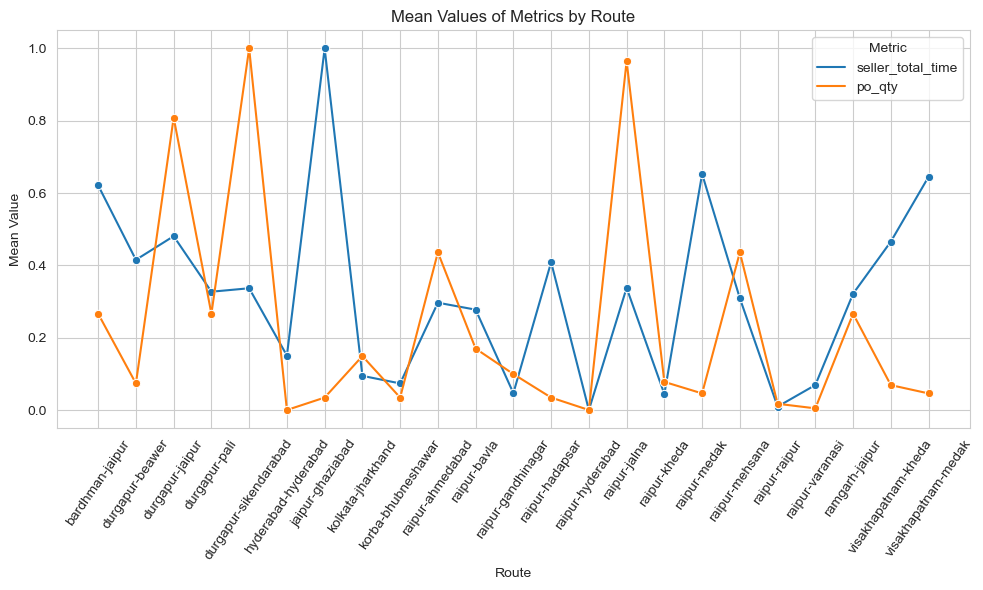

In [666]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()

# Calculate mean values
mean_values = df.groupby('route')[['po_qty', 'seller_total_time']].mean().reset_index()

# Normalize the mean values
mean_values_normalized = mean_values.copy()
mean_values_normalized[['po_qty', 'seller_total_time']] = scaler.fit_transform(mean_values[['po_qty', 'seller_total_time']])

# Melt the DataFrame to make plotting easier
mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], value_vars=[ 'seller_total_time', 'po_qty'],
                             var_name='Metric', value_name='Mean Value')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
plt.title('Mean Values of Metrics by Route')
plt.xlabel('Route')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.xticks(rotation=55)

plt.grid(True)
plt.tight_layout()

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


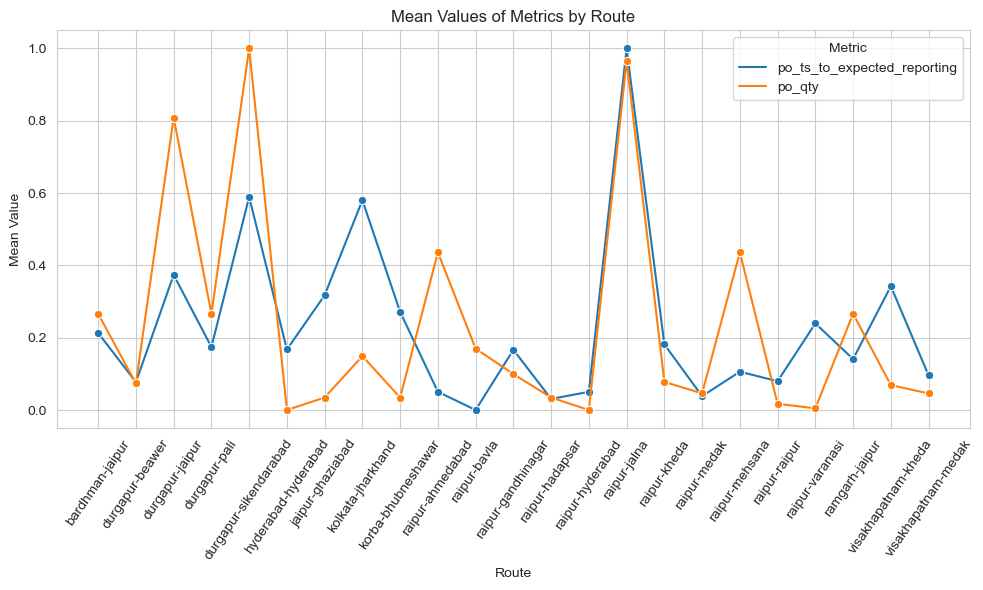

In [670]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()

# Calculate mean values
mean_values = df.groupby('route')[['po_qty', 'po_ts_to_expected_reporting']].mean().reset_index()

# Normalize the mean values
mean_values_normalized = mean_values.copy()
mean_values_normalized[['po_qty', 'po_ts_to_expected_reporting']] = scaler.fit_transform(mean_values[['po_qty', 'po_ts_to_expected_reporting']])

# Melt the DataFrame to make plotting easier
mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], value_vars=[ 'po_ts_to_expected_reporting', 'po_qty'],
                             var_name='Metric', value_name='Mean Value')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
plt.title('Mean Values of Metrics by Route')
plt.xlabel('Route')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.xticks(rotation=55)

plt.grid(True)
plt.tight_layout()

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


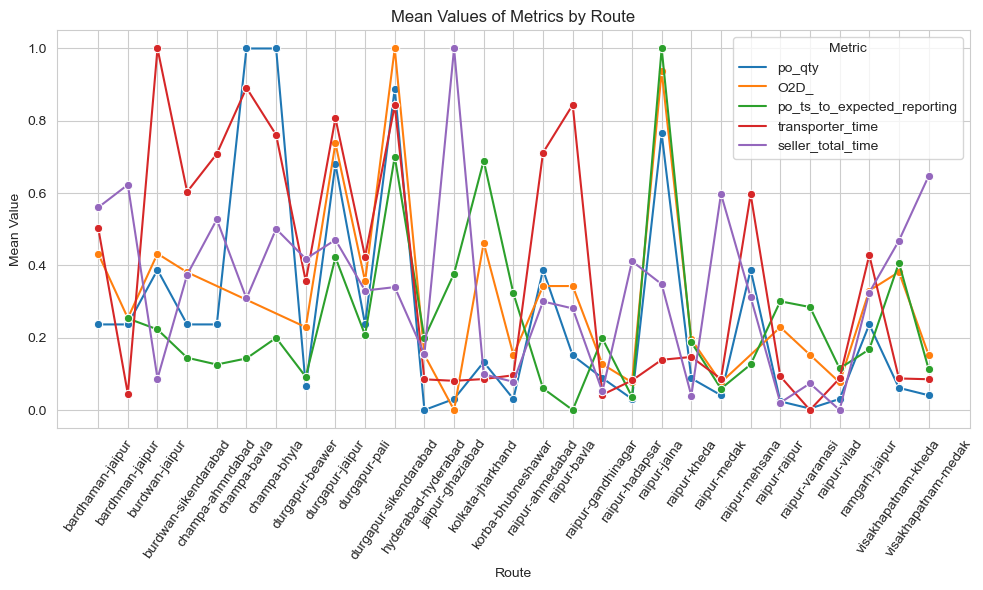

In [740]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()

# Calculate mean values
mean_values = df.groupby('route')[['po_qty', 'O2D_', 'po_ts_to_expected_reporting','transporter_time','seller_total_time' ]].mean().reset_index()

# Normalize the mean values
mean_values_normalized = mean_values.copy()
mean_values_normalized[['po_qty', 'O2D_', 'po_ts_to_expected_reporting','transporter_time','seller_total_time']] = scaler.fit_transform(mean_values[['po_qty', 'O2D_', 'po_ts_to_expected_reporting','transporter_time','seller_total_time']])

# Melt the DataFrame to make plotting easier
mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], 
                             value_vars=[ 'po_qty', 'O2D_', 'po_ts_to_expected_reporting','transporter_time','seller_total_time'],
                             var_name='Metric', value_name='Mean Value')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
plt.title('Mean Values of Metrics by Route')
plt.xlabel('Route')
plt.ylabel('Mean Value')
plt.legend(title='Metric')
plt.xticks(rotation=55)

plt.grid(True)
plt.tight_layout()

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

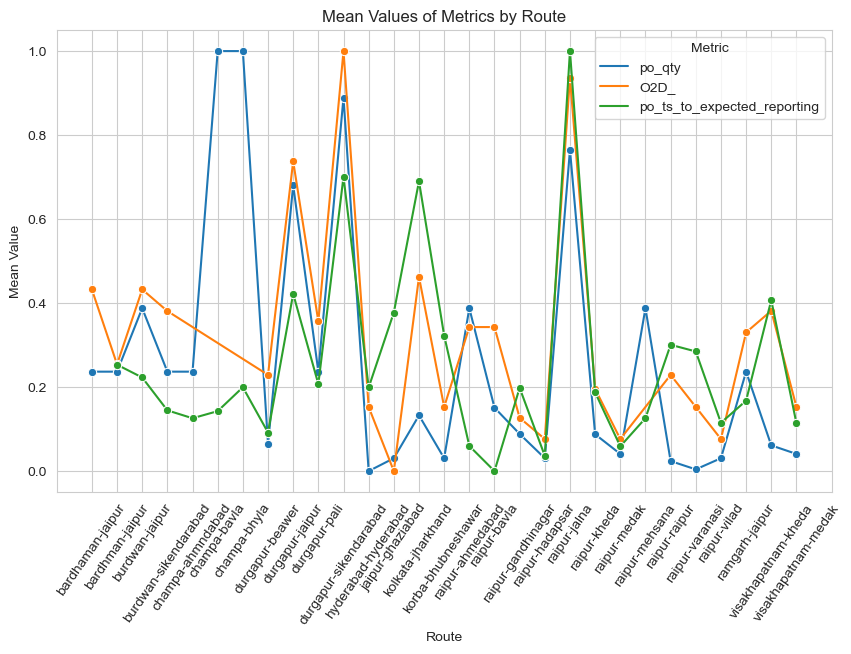

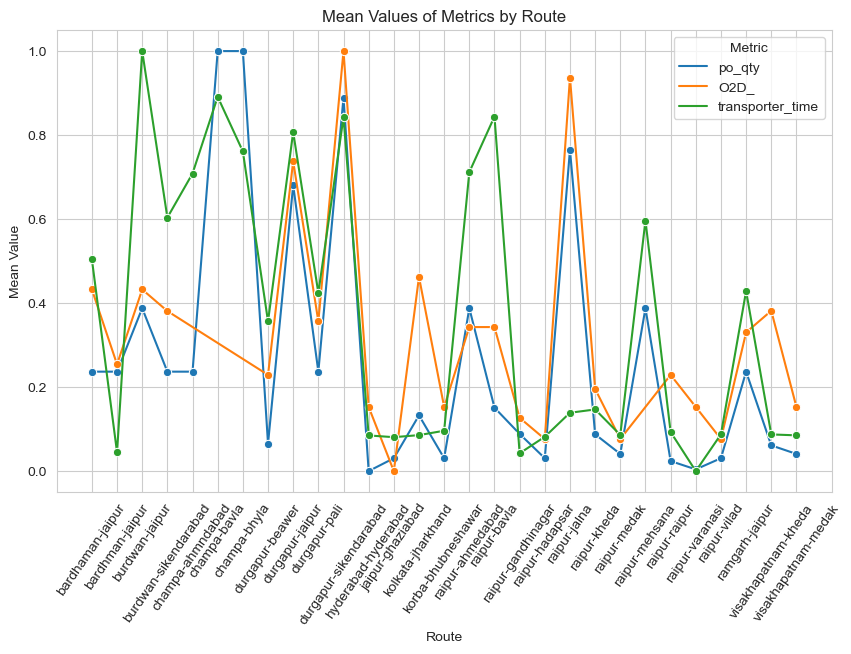

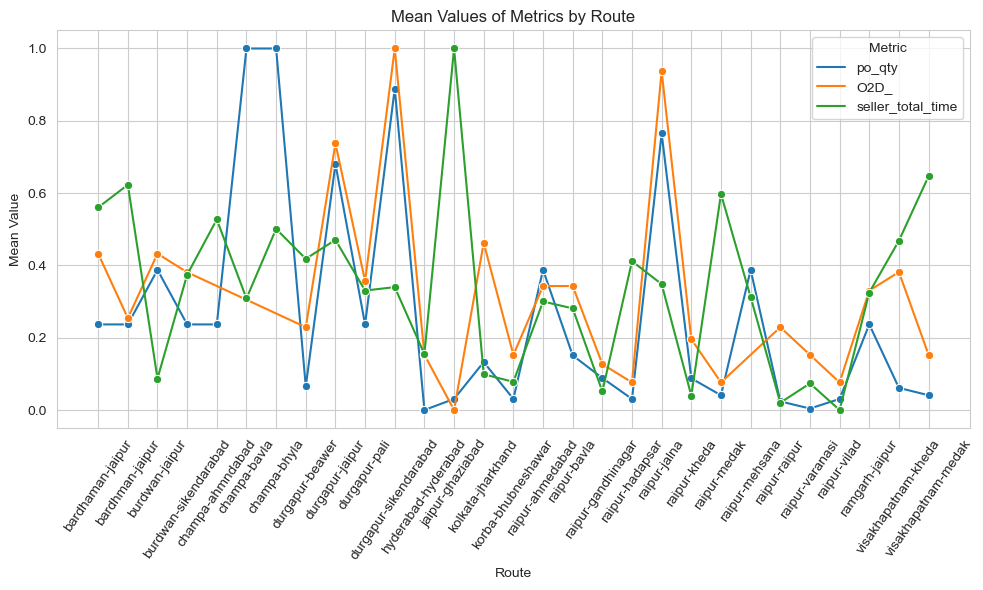

In [742]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
scaler = MinMaxScaler()

# Calculate mean values

for col in ['po_ts_to_expected_reporting','transporter_time','seller_total_time']:
    mean_values = df.groupby('route')[['po_qty', 'O2D_', col ]].mean().reset_index()
    
    # Normalize the mean values
    mean_values_normalized = mean_values.copy()
    mean_values_normalized[['po_qty', 'O2D_',col]] = scaler.fit_transform(mean_values[['po_qty', 'O2D_', col]])
    
    # Melt the DataFrame to make plotting easier
    mean_values_melted = pd.melt(mean_values_normalized, id_vars=['route'], 
                                 value_vars=[ 'po_qty', 'O2D_', col],
                                 var_name='Metric', value_name='Mean Value')
    
    # Plotting
    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='route', y='Mean Value', hue='Metric', data=mean_values_melted, marker='o')
    plt.title('Mean Values of Metrics by Route')
    plt.xlabel('Route')
    plt.ylabel('Mean Value')
    plt.legend(title='Metric')
    plt.xticks(rotation=55)
    
    plt.grid(True)
plt.tight_layout()

plt.show()


In [748]:
df[['po_qty', 'O2D_', 'po_ts_to_expected_reporting','transporter_time','seller_total_time','route_bardhaman-jaipur',
       'route_bardhman-jaipur', 'route_burdwan-jaipur',
       'route_burdwan-sikendarabad', 'route_champa-ahmndabad',
       'route_champa-bavla', 'route_champa-bhyla', 'route_durgapur-beawer',
       'route_durgapur-jaipur', 'route_durgapur-pali',
       'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_korba-bhubneshawar', 'route_raipur-ahmedabad',
       'route_raipur-bavla', 'route_raipur-gandhinagar',
       'route_raipur-hadapsar', 'route_raipur-jalna', 'route_raipur-kheda',
       'route_raipur-medak', 'route_raipur-mehsana', 'route_raipur-raipur',
       'route_raipur-varanasi', 'route_raipur-vilad', 'route_ramgarh-jaipur',
       'route_visakhapatnam-kheda', 'route_visakhapatnam-medak',
       'steel', 'al']].corr()

po_qty      O2D_  po_ts_to_expected_reporting  \
po_qty                       1.000000  0.877141                     0.545101   
O2D_                         0.877141  1.000000                     0.729389   
po_ts_to_expected_reporting  0.545101  0.729389                     1.000000   
transporter_time             0.407922  0.356517                    -0.199141   
seller_total_time            0.121175  0.059450                     0.004173   
route_bardhaman-jaipur      -0.062714 -0.045036                          NaN   
route_bardhman-jaipur       -0.109322 -0.138209                    -0.067340   
route_burdwan-jaipur        -0.032921 -0.045036                    -0.043550   
route_burdwan-sikendarabad  -0.109322 -0.095773                    -0.097966   
route_champa-ahmndabad      -0.088974       NaN                    -0.084037   
route_champa-bavla           0.087858       NaN                    -0.056501   
route_champa-bhyla           0.218719       NaN                    -0.117789   
route_durgapur-beawer       -0.096532 -0.084052                    -0.064729   
route_durgapur-jaipur        0.135048  0.074168                    -0.061698   
route_durgapur-pali         -0.109322 -0.104023                    -0.080325   
route_durgapur-sikendarabad  0.441157  0.433886                     0.225827   
route_hyderabad-hyderabad   -0.155231 -0.140073                    -0.067239   
route_jaipur-ghaziabad      -0.103376 -0.127973                    -0.018540   
route_kolkata-jharkhand     -0.145114 -0.068590                     0.045342   
route_korba-bhubneshawar    -0.146664 -0.098692                    -0.038876   
route_raipur-ahmedabad      -0.081956 -0.155185                    -0.174031   
route_raipur-bavla          -0.112964 -0.088289                    -0.112890   
route_raipur-gandhinagar    -0.160319 -0.180817                    -0.082893   
route_raipur-hadapsar       -0.103376 -0.113332                    -0.073686   
route_raipur-jalna           0.246488  0.311542                     0.488245   
route_raipur-kheda          -0.330976 -0.279478                    -0.177095   
route_raipur-medak          -0.143808 -0.160852                    -0.099374   
route_raipur-mehsana        -0.066481       NaN                    -0.119587   
route_raipur-raipur         -0.182543 -0.146633                    -0.053980   
route_raipur-varanasi       -0.108610 -0.098692                    -0.033531   
route_raipur-vilad          -0.103376 -0.113332                    -0.060994   
route_ramgarh-jaipur        -0.109322 -0.112785                    -0.091470   
route_visakhapatnam-kheda   -0.097337 -0.054771                    -0.013770   
route_visakhapatnam-medak   -0.101363 -0.098692                    -0.061176   
steel                        0.622573  0.544925                     0.259760   
al                          -0.622573 -0.544925                    -0.259760   

                             transporter_time  seller_total_time  \
po_qty                               0.407922           0.121175   
O2D_                                 0.356517           0.059450   
po_ts_to_expected_reporting         -0.199141           0.004173   
transporter_time                     1.000000          -0.034443   
seller_total_time                   -0.034443           1.000000   
route_bardhaman-jaipur               0.000945           0.062975   
route_bardhman-jaipur               -0.117636           0.140330   
route_burdwan-jaipur                 0.074764          -0.068711   
route_burdwan-sikendarabad           0.027423           0.011237   
route_champa-ahmndabad               0.044499           0.076273   
route_champa-bavla                   0.058560          -0.007095   
route_champa-bhyla                   0.097608           0.105299   
route_durgapur-beawer               -0.021072           0.023459   
route_durgapur-jaipur                0.250219           0.207052   
route_durgapur-pali                 -0.019132     

In [747]:
df.columns

Index(['sno', 'date', 'po_number', 'po_qty', 'seller_po_creation_date',
       'category', 'dispatched_qty', 'origin', 'destination', 'dispatch_week',
       'po_ts', 'nextbuy_order_indent_ts', 'nextbuy_vehicle_indent_ts',
       'transporter_order_indent_ts', 'transporter_order_indent_acceptance_ts',
       'vehicle_placement_ts', 'expected_date_of_vehicle_reporting',
       'vehicle_reported_ts', 'vehicle_loaded_ts', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'nextbuy_order_indent_tat', 'nextbuy_vehicle_indent_tat',
       'vehicle_placement_tat', 'vehicle_reported_tat', 'vehicle_dispatch_tat',
       'vehicle_reported_actual_vs_expected', 'transporter_order_tat',
       'dispatch_to_delivery_tat', 'unloading_tat', 'vehicle_level_o2d',
       'buyer_name', 'seller_name', 'seller_po_number', 'transporter_type',
       'order_type', 'order_completion_percentage', 'O2D_', 'O2D_Bucke